# Analysis

## import ライブラリー

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Data定義

In [2]:
%%time
df_subjects_info = pd.read_csv('../02_data_analysis/subjects_info/subjects_info.csv')
#df_aal = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_aal.csv')
#df_ho = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_ho.csv')

#df_dynamic_aal = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_aal.csv')
#df_dynamic_ho = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_ho.csv')

CPU times: user 28.7 ms, sys: 260 µs, total: 29 ms
Wall time: 27.8 ms


In [3]:
def make_info_data(df = df_subjects_info,col = ['Age','Sex','やる気スコア(Apathy scale)']):
    subID = np.array(df.subID)
    subjects_info_list = []
    for ID in subID:
        data = np.array(df[df.subID == ID][col])[0]
        if 'Sex' in col:
            idx_sex = col.index('Sex')
            if data[idx_sex] == '男':
                data[idx_sex] = 0
            else:
                data[idx_sex] = 1
        
        subjects_info_list.append(data)
    subjects_info = np.array(subjects_info_list)
    
    if 'Age' in col:
        idx_age = col.index('Age')
    for i in range(len(col)):
        if i == idx_age:
            subjects_info[:,i] = (subjects_info[:,i] - \
                                  np.mean(subjects_info[:,i]))/np.std(subjects_info[:,i])
    return subjects_info.astype(np.float)

def make_data(df, subID = df_subjects_info.subID ,remove_list = ['time','subID']):
    data_list = []
    df_cols = list(df.columns)
    for r in remove_list:
        try:
            df_cols.remove(r)
        except:
            pass
    for ID in df_subjects_info.subID:
        data = df[df.subID == ID][df_cols]
        data = np.array(data)
        data_list.append(data)
    data = np.array(data_list)
    return data

In [4]:
%%time
data_label = make_info_data()
age_mean= df_subjects_info.Age.mean()
age_std = df_subjects_info.Age.std()

#data_aal = make_data(df_aal)
#data_ho = make_data(df_ho)
#data_dynamic_aal = make_data(df_dynamic_aal)
#data_dynamic_ho  = make_data(df_dynamic_ho)

CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


### AAL

In [5]:
aal_1 = np.load('../02_data_analysis/temp/aal_1.npz', allow_pickle=True)
aal_2 = np.load('../02_data_analysis/temp/aal_2.npz', allow_pickle=True)
aal_dynamic_1 = np.load('../02_data_analysis/temp/dynamic_aal_1.npz', allow_pickle=True)
aal_dynamic_2 = np.load('../02_data_analysis/temp/dynamic_aal_2.npz', allow_pickle=True)

test_pred_aal_1 = aal_1['arr_0']
test_pred_aal_corrected_1 = aal_1['arr_1']
test_label_aal_1 = aal_1['arr_2']
test_idx_aal_1 = aal_1['arr_3']

test_pred_aal_2 = aal_2['arr_0']
test_pred_aal_corrected_2 = aal_2['arr_1']
test_label_aal_2 = aal_2['arr_2']
test_idx_aal_2 = aal_2['arr_3']

test_pred_aal_dynamic_1 = aal_dynamic_1['arr_0']
test_pred_aal_dynamic_corrected_1 = aal_dynamic_1['arr_1']
test_label_aal_dynamic_1 = aal_dynamic_1['arr_2']
test_idx_aal_dynamic_1 = aal_dynamic_1['arr_3']

test_pred_aal_dynamic_2 = aal_dynamic_2['arr_0']
test_pred_aal_dynamic_corrected_2 = aal_dynamic_2['arr_1']
test_label_aal_dynamic_2 = aal_dynamic_2['arr_2']
test_idx_aal_dynamic_2 = aal_dynamic_2['arr_3']

### Harvard-Oxford

In [6]:
ho_1 = np.load('../02_data_analysis/temp/ho_1.npz', allow_pickle=True)
ho_2 = np.load('../02_data_analysis/temp/ho_2.npz', allow_pickle=True)
ho_dynamic_1 = np.load('../02_data_analysis/temp/dynamic_ho_1.npz', allow_pickle=True)
ho_dynamic_2 = np.load('../02_data_analysis/temp/dynamic_ho_2.npz', allow_pickle=True)

test_pred_ho_1 = ho_1['arr_0']
test_pred_ho_corrected_1 = ho_1['arr_1']
test_label_ho_1 = ho_1['arr_2']
test_idx_ho_1 = ho_1['arr_3']

test_pred_ho_2 = ho_2['arr_0']
test_pred_ho_corrected_2 = ho_2['arr_1']
test_label_ho_2 = ho_2['arr_2']
test_idx_ho_2 = ho_2['arr_3']

test_pred_ho_dynamic_1 = ho_dynamic_1['arr_0']
test_pred_ho_dynamic_corrected_1 = ho_dynamic_1['arr_1']
test_label_ho_dynamic_1 = ho_dynamic_1['arr_2']
test_idx_ho_dynamic_1 = ho_dynamic_1['arr_3']

test_pred_ho_dynamic_2 = ho_dynamic_2['arr_0']
test_pred_ho_dynamic_corrected_2 = ho_dynamic_2['arr_1']
test_label_ho_dynamic_2 = ho_dynamic_2['arr_2']
test_idx_ho_dynamic_2 = ho_dynamic_2['arr_3']

### Multi ALL

In [7]:
multi_aal_1 = np.load('../02_data_analysis/temp/multi_aal_1.npz', allow_pickle=True)
multi_aal_2 = np.load('../02_data_analysis/temp/multi_aal_2.npz', allow_pickle=True)
multi_aal_dynamic_1 = np.load('../02_data_analysis/temp/multi_dynamic_aal_1.npz', allow_pickle=True)
multi_aal_dynamic_2 = np.load('../02_data_analysis/temp/multi_dynamic_aal_2.npz', allow_pickle=True)

test_pred_multi_aal_1 = multi_aal_1['arr_0']
test_pred_multi_aal_corrected_1 = multi_aal_1['arr_1']
test_label_multi_aal_1 = multi_aal_1['arr_2']
test_idx_multi_aal_1 = multi_aal_1['arr_3']

test_pred_multi_aal_2 = multi_aal_2['arr_0']
test_pred_multi_aal_corrected_2 = multi_aal_2['arr_1']
test_label_multi_aal_2 = multi_aal_2['arr_2']
test_idx_multi_aal_2 = multi_aal_2['arr_3']

test_pred_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_0']
test_pred_multi_aal_dynamic_corrected_1 = multi_aal_dynamic_1['arr_1']
test_label_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_2']
test_idx_multi_aal_dynamic_1 = multi_aal_dynamic_1['arr_3']

test_pred_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_0']
test_pred_multi_aal_dynamic_corrected_2 = multi_aal_dynamic_2['arr_1']
test_label_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_2']
test_idx_multi_aal_dynamic_2 = multi_aal_dynamic_2['arr_3']

In [8]:
multi_smooth_aal_1 = np.load('../02_data_analysis/temp/multi_smooth_aal_1.npz', allow_pickle=True)
multi_smooth_aal_2 = np.load('../02_data_analysis/temp/multi_smooth_aal_2.npz', allow_pickle=True)
multi_smooth_aal_dynamic_1 = np.load('../02_data_analysis/temp/multi_smooth_dynamic_aal_1.npz', allow_pickle=True)
multi_smooth_aal_dynamic_2 = np.load('../02_data_analysis/temp/multi_smooth_dynamic_aal_2.npz', allow_pickle=True)

test_pred_multi_smooth_aal_1 = multi_smooth_aal_1['arr_0']
test_pred_multi_smooth_aal_corrected_1 = multi_smooth_aal_1['arr_1']
test_label_multi_smooth_aal_1 = multi_smooth_aal_1['arr_2']
test_idx_multi_smooth_aal_1 = multi_smooth_aal_1['arr_3']

test_pred_multi_smooth_aal_2 = multi_smooth_aal_2['arr_0']
test_pred_multi_smooth_aal_corrected_2 = multi_smooth_aal_2['arr_1']
test_label_multi_smooth_aal_2 = multi_smooth_aal_2['arr_2']
test_idx_multi_smooth_aal_2 = multi_smooth_aal_2['arr_3']

test_pred_multi_smooth_aal_dynamic_1 = multi_smooth_aal_dynamic_1['arr_0']
test_pred_multi_smooth_aal_dynamic_corrected_1 = multi_smooth_aal_dynamic_1['arr_1']
test_label_multi_smooth_aal_dynamic_1 = multi_smooth_aal_dynamic_1['arr_2']
test_idx_multi_smooth_aal_dynamic_1 = multi_smooth_aal_dynamic_1['arr_3']

test_pred_multi_smooth_aal_dynamic_2 = multi_smooth_aal_dynamic_2['arr_0']
test_pred_multi_smooth_aal_dynamic_corrected_2 = multi_smooth_aal_dynamic_2['arr_1']
test_label_multi_smooth_aal_dynamic_2 = multi_smooth_aal_dynamic_2['arr_2']
test_idx_multi_smooth_aal_dynamic_2 = multi_smooth_aal_dynamic_2['arr_3']

### Multi Harvard-Oxford

In [9]:
multi_ho_1 = np.load('../02_data_analysis/temp/multi_ho_1.npz', allow_pickle=True)
multi_ho_2 = np.load('../02_data_analysis/temp/multi_ho_2.npz', allow_pickle=True)
multi_ho_dynamic_1 = np.load('../02_data_analysis/temp/multi_dynamic_ho_1.npz', allow_pickle=True)
multi_ho_dynamic_2 = np.load('../02_data_analysis/temp/multi_dynamic_ho_2.npz', allow_pickle=True)

test_pred_multi_ho_1 = multi_ho_1['arr_0']
test_pred_multi_ho_corrected_1 = multi_ho_1['arr_1']
test_label_multi_ho_1 = multi_ho_1['arr_2']
test_idx_multi_ho_1 = multi_ho_1['arr_3']

test_pred_multi_ho_2 = multi_ho_2['arr_0']
test_pred_multi_ho_corrected_2 = multi_ho_2['arr_1']
test_label_multi_ho_2 = multi_ho_2['arr_2']
test_idx_multi_ho_2 = multi_ho_2['arr_3']

test_pred_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_0']
test_pred_multi_ho_dynamic_corrected_1 = multi_ho_dynamic_1['arr_1']
test_label_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_2']
test_idx_multi_ho_dynamic_1 = multi_ho_dynamic_1['arr_3']

test_pred_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_0']
test_pred_multi_ho_dynamic_corrected_2 = multi_ho_dynamic_2['arr_1']
test_label_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_2']
test_idx_multi_ho_dynamic_2 = multi_ho_dynamic_2['arr_3']

In [10]:
multi_smooth_ho_1 = np.load('../02_data_analysis/temp/multi_smooth_ho_1.npz', allow_pickle=True)
multi_smooth_ho_2 = np.load('../02_data_analysis/temp/multi_smooth_ho_2.npz', allow_pickle=True)
multi_smooth_ho_dynamic_1 = np.load('../02_data_analysis/temp/multi_smooth_dynamic_ho_1.npz', allow_pickle=True)
multi_smooth_ho_dynamic_2 = np.load('../02_data_analysis/temp/multi_smooth_dynamic_ho_2.npz', allow_pickle=True)

test_pred_multi_smooth_ho_1 = multi_smooth_ho_1['arr_0']
test_pred_multi_smooth_ho_corrected_1 = multi_smooth_ho_1['arr_1']
test_label_multi_smooth_ho_1 = multi_smooth_ho_1['arr_2']
test_idx_multi_smooth_ho_1 = multi_smooth_ho_1['arr_3']

test_pred_multi_smooth_ho_2 = multi_smooth_ho_2['arr_0']
test_pred_multi_smooth_ho_corrected_2 = multi_smooth_ho_2['arr_1']
test_label_multi_smooth_ho_2 = multi_smooth_ho_2['arr_2']
test_idx_multi_smooth_ho_2 = multi_smooth_ho_2['arr_3']

test_pred_multi_smooth_ho_dynamic_1 = multi_smooth_ho_dynamic_1['arr_0']
test_pred_multi_smooth_ho_dynamic_corrected_1 = multi_smooth_ho_dynamic_1['arr_1']
test_label_multi_smooth_ho_dynamic_1 = multi_smooth_ho_dynamic_1['arr_2']
test_idx_multi_smooth_ho_dynamic_1 = multi_smooth_ho_dynamic_1['arr_3']

test_pred_multi_smooth_ho_dynamic_2 = multi_smooth_ho_dynamic_2['arr_0']
test_pred_multi_smooth_ho_dynamic_corrected_2 = multi_smooth_ho_dynamic_2['arr_1']
test_label_multi_smooth_ho_dynamic_2 = multi_smooth_ho_dynamic_2['arr_2']
test_idx_multi_smooth_ho_dynamic_2 = multi_smooth_ho_dynamic_2['arr_3']

### LSTM AAL

In [11]:
aal_lstm = np.load('../02_data_analysis/temp/aal_lstm.npz', allow_pickle=True)
aal_lstm_bi = np.load('../02_data_analysis/temp/aal_lstm_bi.npz', allow_pickle=True)
aal_dynamic_lstm = np.load('../02_data_analysis/temp/dynamic_aal_lstm.npz', allow_pickle=True)
aal_dynamic_lstm_bi = np.load('../02_data_analysis/temp/dynamic_aal_lstm_bi.npz', allow_pickle=True)

test_pred_aal_lstm = aal_lstm['arr_0']
test_pred_aal_corrected_lstm = aal_lstm['arr_1']
test_label_aal_lstm = aal_lstm['arr_2']
test_idx_aal_lstm = aal_lstm['arr_3']

test_pred_aal_lstm_bi = aal_lstm_bi['arr_0']
test_pred_aal_corrected_lstm_bi = aal_lstm_bi['arr_1']
test_label_aal_lstm_bi = aal_lstm_bi['arr_2']
test_idx_aal_lstm_bi = aal_lstm_bi['arr_3']

test_pred_aal_dynamic_lstm = aal_dynamic_lstm['arr_0']
test_pred_aal_dynamic_corrected_lstm = aal_dynamic_lstm['arr_1']
test_label_aal_dynamic_lstm = aal_dynamic_lstm['arr_2']
test_idx_aal_dynamic_lstm = aal_dynamic_lstm['arr_3']

test_pred_aal_dynamic_lstm_bi = aal_dynamic_lstm_bi['arr_0']
test_pred_aal_dynamic_corrected_lstm_bi = aal_dynamic_lstm_bi['arr_1']
test_label_aal_dynamic_lstm_bi = aal_dynamic_lstm_bi['arr_2']
test_idx_aal_dynamic_lstm_bi = aal_dynamic_lstm_bi['arr_3']

### LSTM Harvard-Oxford

In [12]:
ho_lstm = np.load('../02_data_analysis/temp/ho_lstm.npz', allow_pickle=True)
ho_lstm_bi = np.load('../02_data_analysis/temp/ho_lstm_bi.npz', allow_pickle=True)
ho_dynamic_lstm = np.load('../02_data_analysis/temp/dynamic_ho_lstm.npz', allow_pickle=True)
ho_dynamic_lstm_bi = np.load('../02_data_analysis/temp/dynamic_ho_lstm_bi.npz', allow_pickle=True)

test_pred_ho_lstm = ho_lstm['arr_0']
test_pred_ho_corrected_lstm = ho_lstm['arr_1']
test_label_ho_lstm = ho_lstm['arr_2']
test_idx_ho_lstm = ho_lstm['arr_3']

test_pred_ho_lstm_bi = ho_lstm_bi['arr_0']
test_pred_ho_corrected_lstm_bi = ho_lstm_bi['arr_1']
test_label_ho_lstm_bi = ho_lstm_bi['arr_2']
test_idx_ho_lstm_bi = ho_lstm_bi['arr_3']

test_pred_ho_dynamic_lstm = ho_dynamic_lstm['arr_0']
test_pred_ho_dynamic_corrected_lstm = ho_dynamic_lstm['arr_1']
test_label_ho_dynamic_lstm = ho_dynamic_lstm['arr_2']
test_idx_ho_dynamic_lstm = ho_dynamic_lstm['arr_3']

test_pred_ho_dynamic_lstm_bi = ho_dynamic_lstm_bi['arr_0']
test_pred_ho_dynamic_corrected_lstm_bi = ho_dynamic_lstm_bi['arr_1']
test_label_ho_dynamic_lstm_bi = ho_dynamic_lstm_bi['arr_2']
test_idx_ho_dynamic_lstm_bi = ho_dynamic_lstm_bi['arr_3']

### Single AAL

In [13]:
aal_sex_1 = np.load('../02_data_analysis/temp/aal_sex_1.npz', allow_pickle=True)
aal_sex_2 = np.load('../02_data_analysis/temp/aal_sex_2.npz', allow_pickle=True)
aal_sex_dynamic_1 = np.load('../02_data_analysis/temp/dynamic_aal_sex_1.npz', allow_pickle=True)
aal_sex_dynamic_2 = np.load('../02_data_analysis/temp/dynamic_aal_sex_2.npz', allow_pickle=True)

test_pred_aal_sex_1 = aal_sex_1['arr_0']
test_pred_aal_sex_corrected_1 = aal_sex_1['arr_1']
test_label_aal_sex_1 = aal_sex_1['arr_2']
test_idx_aal_sex_1 = aal_sex_1['arr_3']

test_pred_aal_sex_2 = aal_sex_2['arr_0']
test_pred_aal_sex_corrected_2 = aal_sex_2['arr_1']
test_label_aal_sex_2 = aal_sex_2['arr_2']
test_idx_aal_sex_2 = aal_sex_2['arr_3']

test_pred_aal_sex_dynamic_1 = aal_sex_dynamic_1['arr_0']
test_pred_aal_sex_dynamic_corrected_1 = aal_sex_dynamic_1['arr_1']
test_label_aal_sex_dynamic_1 = aal_sex_dynamic_1['arr_2']
test_idx_aal_sex_dynamic_1 = aal_sex_dynamic_1['arr_3']

test_pred_aal_sex_dynamic_2 = aal_sex_dynamic_2['arr_0']
test_pred_aal_sex_dynamic_corrected_2 = aal_sex_dynamic_2['arr_1']
test_label_aal_sex_dynamic_2 = aal_sex_dynamic_2['arr_2']
test_idx_aal_sex_dynamic_2 = aal_sex_dynamic_2['arr_3']

### Single Harvard-Oxford

In [14]:
ho_sex_1 = np.load('../02_data_analysis/temp/ho_sex_1.npz', allow_pickle=True)
ho_sex_2 = np.load('../02_data_analysis/temp/ho_sex_2.npz', allow_pickle=True)
ho_sex_dynamic_1 = np.load('../02_data_analysis/temp/dynamic_ho_sex_1.npz', allow_pickle=True)
ho_sex_dynamic_2 = np.load('../02_data_analysis/temp/dynamic_ho_sex_2.npz', allow_pickle=True)

test_pred_ho_sex_1 = ho_sex_1['arr_0']
test_pred_ho_sex_corrected_1 = ho_sex_1['arr_1']
test_label_ho_sex_1 = ho_sex_1['arr_2']
test_idx_ho_sex_1 = ho_sex_1['arr_3']

test_pred_ho_sex_2 = ho_sex_2['arr_0']
test_pred_ho_sex_corrected_2 = ho_sex_2['arr_1']
test_label_ho_sex_2 = ho_sex_2['arr_2']
test_idx_ho_sex_2 = ho_sex_2['arr_3']

test_pred_ho_sex_dynamic_1 = ho_sex_dynamic_1['arr_0']
test_pred_ho_sex_dynamic_corrected_1 = ho_sex_dynamic_1['arr_1']
test_label_ho_sex_dynamic_1 = ho_sex_dynamic_1['arr_2']
test_idx_ho_sex_dynamic_1 = ho_sex_dynamic_1['arr_3']

test_pred_ho_sex_dynamic_2 = ho_sex_dynamic_2['arr_0']
test_pred_ho_sex_dynamic_corrected_2 = ho_sex_dynamic_2['arr_1']
test_label_ho_sex_dynamic_2 = ho_sex_dynamic_2['arr_2']
test_idx_ho_sex_dynamic_2 = ho_sex_dynamic_2['arr_3']

In [15]:
np.all(test_label_aal_1 == test_label_aal_2)
test_label = test_label_aal_1
np.all(test_idx_aal_1 == test_idx_aal_2)
test_idx = test_idx_aal_1

True

True

## 予測結果

In [16]:
n_splits = len(test_idx_aal_1)

In [17]:
def mean_absolute_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
            
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_absolute_error(pred,label)

def mean_squared_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_squared_error(pred,label)

In [18]:
print('AAL Transformer')
mean_absolute_error_pred(test_pred_aal_1,test_label)
mean_absolute_error_pred(test_pred_aal_2,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_2,test_label)

print('AAL Multi Transformer')
mean_absolute_error_pred(test_pred_multi_aal_1,test_label)
mean_absolute_error_pred(test_pred_multi_aal_2,test_label)
mean_absolute_error_pred(test_pred_multi_aal_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_multi_aal_dynamic_2,test_label)

print('AAL LSTM')
mean_absolute_error_pred(test_pred_aal_lstm,test_label)
mean_absolute_error_pred(test_pred_aal_lstm_bi,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_lstm,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_lstm_bi,test_label)

AAL Transformer


8.319590959302989

8.23486749743565

8.325730713313844

8.488530307454438

AAL Multi Transformer


8.312958257356861

8.410305776388794

8.308566691093228

8.427613324986822

AAL LSTM


8.649979305950257

8.676151752110036

8.393316171556899

8.549010126924125

In [19]:
print('Harvard-Oxford Transformer')
mean_absolute_error_pred(test_pred_ho_1,test_label)
mean_absolute_error_pred(test_pred_ho_2,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_2,test_label)

print('Harvard-Oxford Multi Transformer')
mean_absolute_error_pred(test_pred_multi_ho_1,test_label)
mean_absolute_error_pred(test_pred_multi_ho_2,test_label)
mean_absolute_error_pred(test_pred_multi_ho_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_multi_ho_dynamic_2,test_label)

print('Harvard-Oxford LSTM')
mean_absolute_error_pred(test_pred_ho_lstm,test_label)
mean_absolute_error_pred(test_pred_ho_lstm_bi,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_lstm,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_lstm_bi,test_label)

Harvard-Oxford Transformer


8.447082354758525

8.411594519431558

8.226821656637641

8.237597701386644

Harvard-Oxford Multi Transformer


8.513530076459919

8.426706523868798

8.05410905371218

8.33297528347872

Harvard-Oxford LSTM


8.48106656719117

8.597852695225885

8.426729046701942

8.394202839180089

In [20]:
def test_plot(preds_ROI1,
              preds_ROI2,
              preds_dfc1,
              preds_dfc2,
              labels,
              title=''):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=96)
    fig.suptitle(title, fontsize=14, x=0.5, y=0.92)   # 図のタイトル
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    
    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,0:1]
            else:
                label = np.concatenate([label,labels[i,:,0:1]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,0:1]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])

        if n == 0:
            lis = [0,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            lis = [0,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            lis = [1,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            lis = [1,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'
            
    
        new_line = '\n'
        
        lr = LinearRegression()
        lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
        corr,p = pearsonr(label[:,0],pred[:,0])
        mae = mean_absolute_error_pred(preds,labels)
        
        axs[lis[0], lis[1]].scatter(label[:,0]*age_std+age_mean,pred[:,0]*age_std+age_mean,
                   label = f'corrcoef : {corr:.3f}{new_line}p value : {p}{new_line}MAE : {mae}')
        
        plt.axes(axs[lis[0], lis[1]])
        plt.plot(label[:,0]*age_std+age_mean,
                 lr.predict(label*age_std+age_mean), color = 'red',
                label = f'y = {lr.coef_[0]:.3f}x + {lr.intercept_:.3f}')#回帰直線をプロット
        plt.title(tit, fontsize=14)    # x軸のラベル
        plt.xlabel('Chronological Age', fontsize=14)    # x軸のラベル
        plt.ylabel('Predicted Age', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        
    path = '../04_result/image/'
    title = title.split()
    path += 'Predict_'
    for s in title:
        path += s + '_'
    path = path[:-1] + '.png'

    fig.savefig(path)

In [115]:
def corrected_predicted_age(preds_ROI1,
                            preds_ROI2,
                            preds_dfc1,
                            preds_dfc2,
                            labels):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    corrected_preds_all = []
    for n, preds in enumerate(preds_list):
        corrected_preds = []
        for i in range(n_splits):
            label = labels[i,:,0:1]
            pred = preds[i].mean(axis=0)[:,0:1]
            lr = LinearRegression()
            lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
            corrected_pred = pred[:,0]*age_std+age_mean + label[:,0]*age_std+age_mean - (lr.coef_[0] * (label[:,0]*age_std+age_mean) + lr.intercept_)
            corrected_pred = (corrected_pred - age_mean) / age_std
            corrected_pred = corrected_pred.reshape(1,corrected_pred.shape[0],1)
            corrected_preds.append(corrected_pred)
        corrected_preds_all.append(corrected_preds)
    return np.array(corrected_preds_all)

### AAL

#### Normal

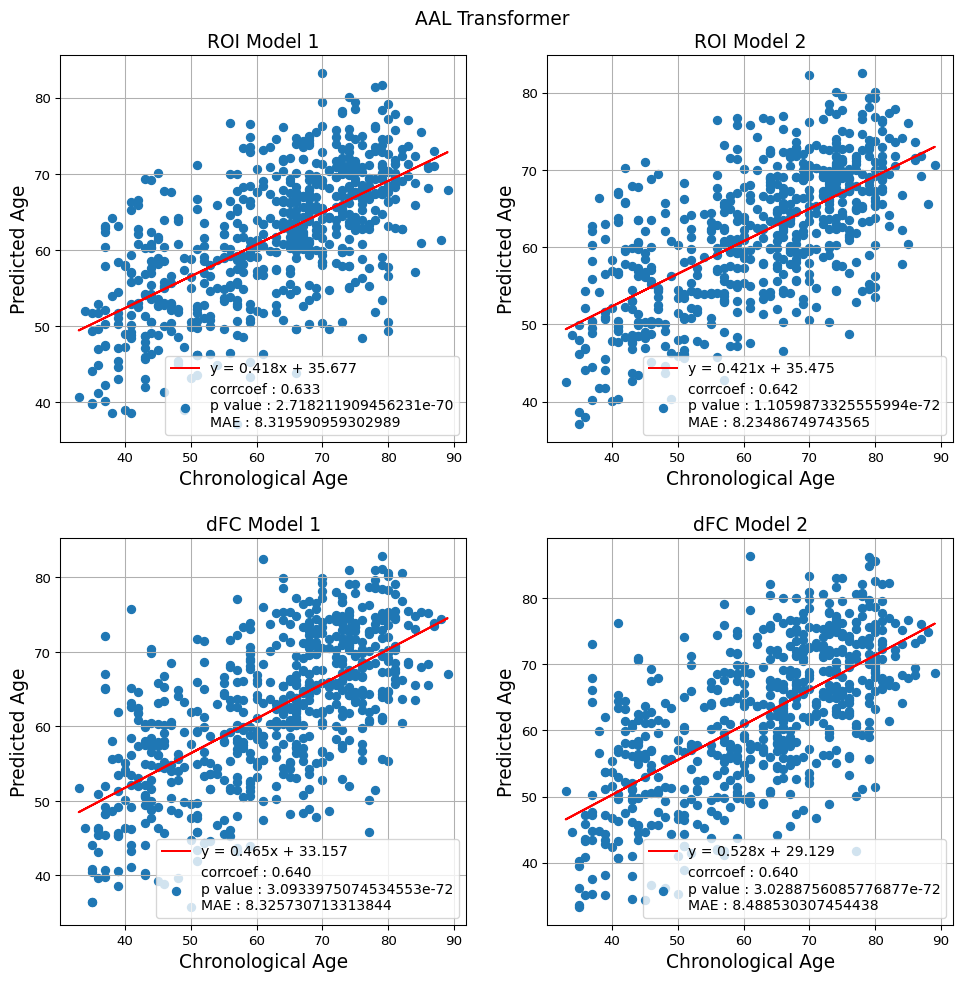

In [21]:
test_plot(test_pred_aal_1,
          test_pred_aal_2,
          test_pred_aal_dynamic_1,
          test_pred_aal_dynamic_2,
          test_label,'AAL Transformer')

#### Corrected 1

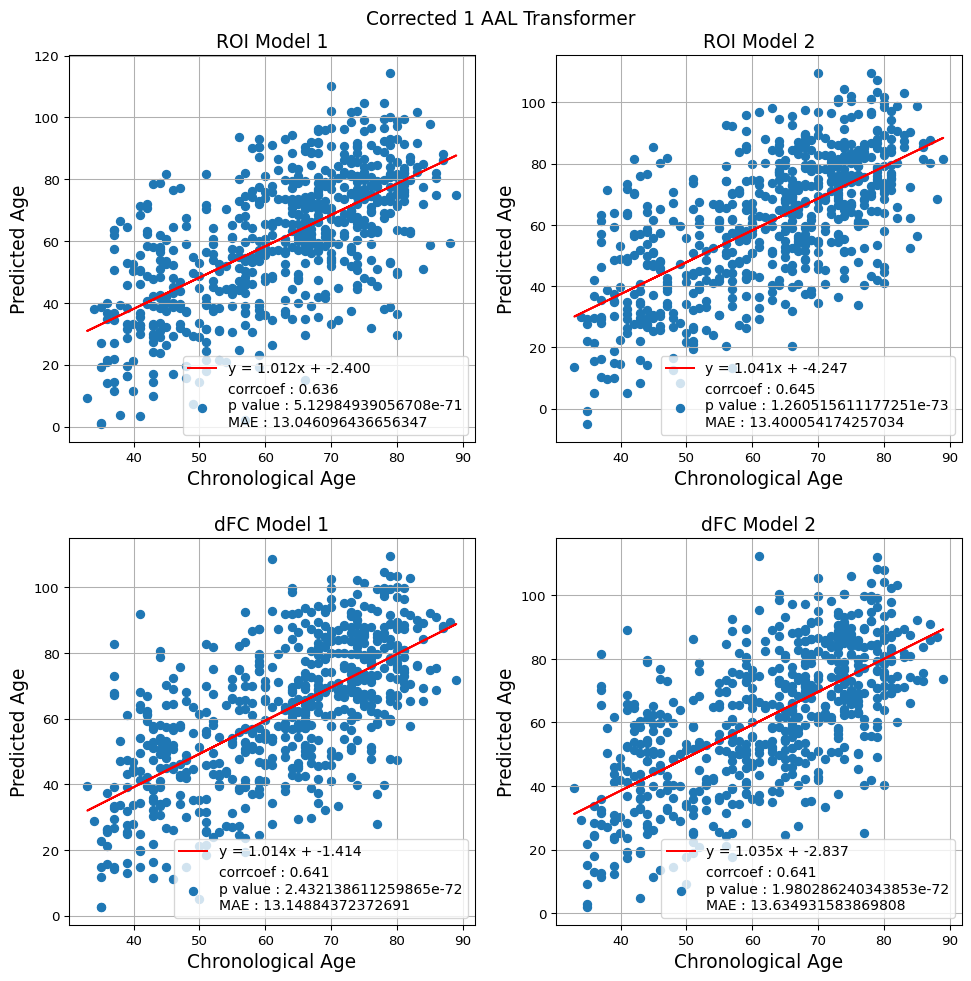

In [122]:
test_plot(test_pred_aal_corrected_1,
          test_pred_aal_corrected_2,
          test_pred_aal_dynamic_corrected_1,
          test_pred_aal_dynamic_corrected_2,
          test_label,'Corrected 1 AAL Transformer')

#### Corrected 2

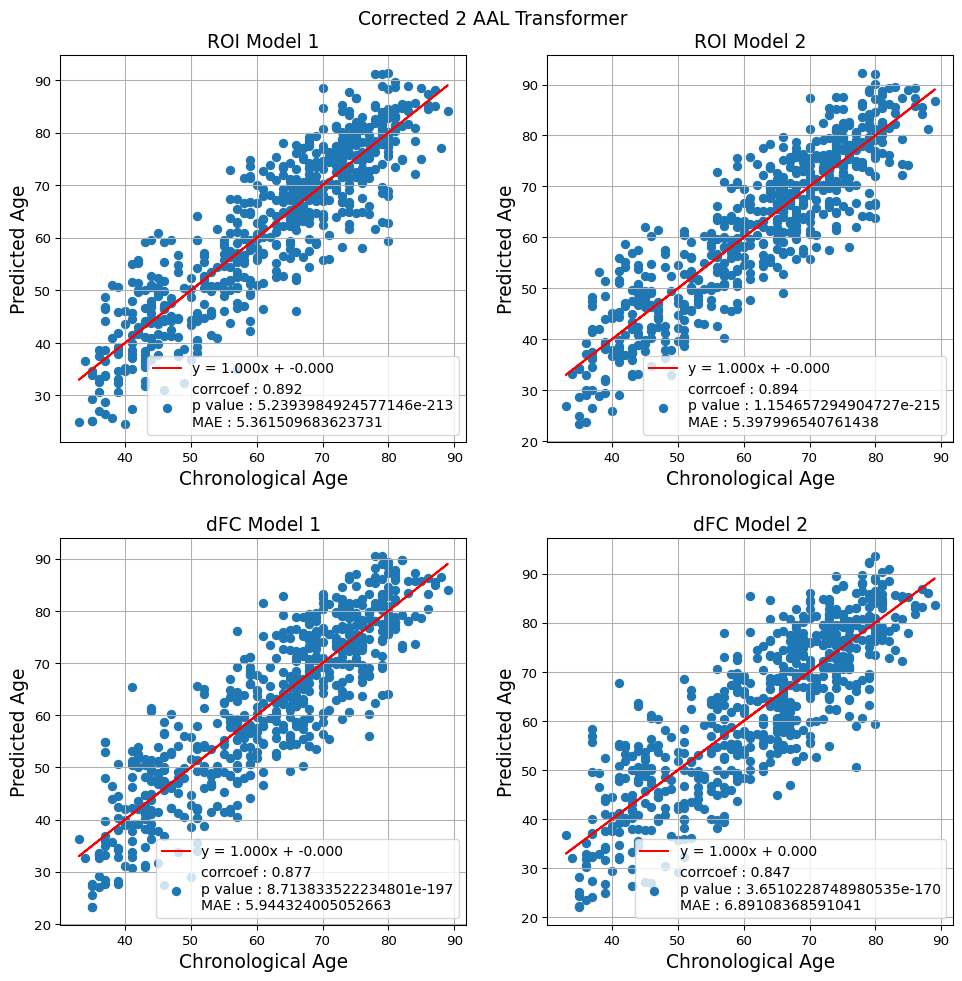

In [123]:
test_corrected_pred_aal_1,\
test_corrected_pred_aal_2,\
test_corrected_pred_aal_dynamic_1,\
test_corrected_pred_aal_dynamic_2 = corrected_predicted_age(test_pred_aal_1,
          test_pred_aal_2,
          test_pred_aal_dynamic_1,
          test_pred_aal_dynamic_2,
          test_label)

test_plot(test_corrected_pred_aal_1,
          test_corrected_pred_aal_2,
          test_corrected_pred_aal_dynamic_1,
          test_corrected_pred_aal_dynamic_2,
          test_label,'Corrected 2 AAL Transformer')

### Harvard-Oxford

#### Normal

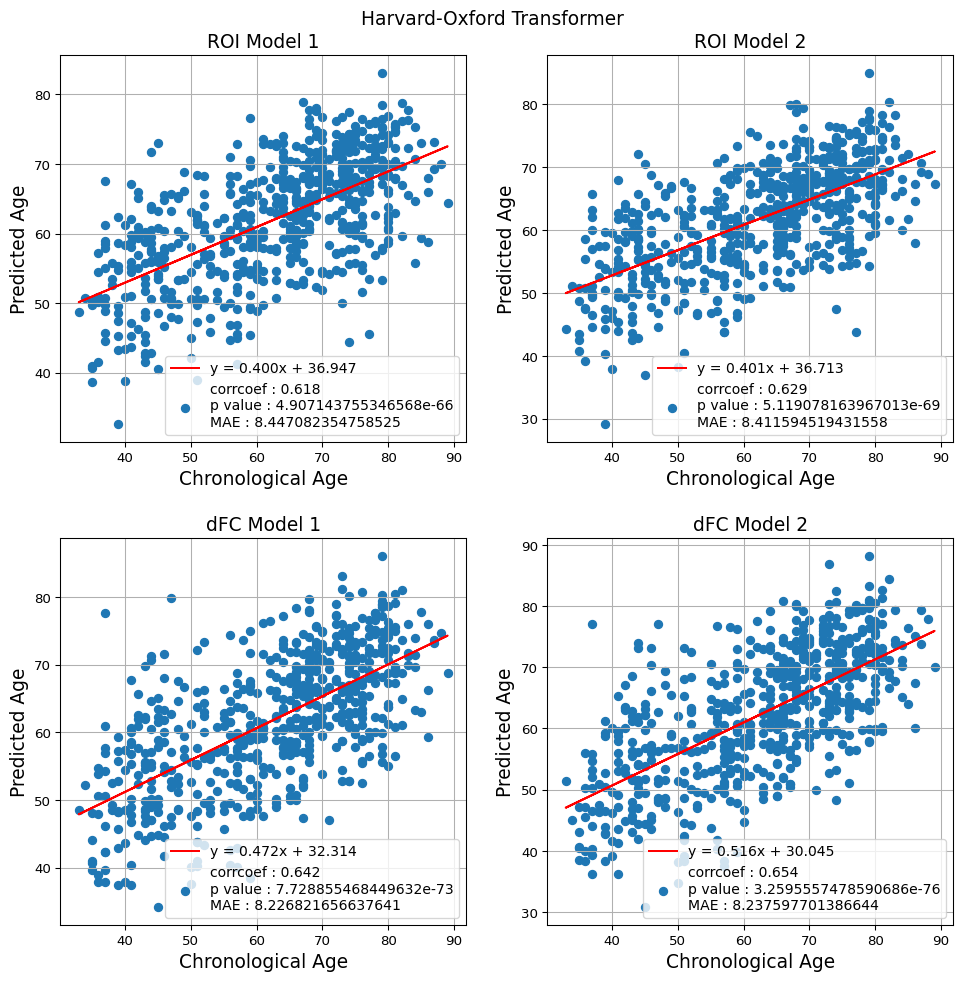

In [23]:
test_plot(test_pred_ho_1,
          test_pred_ho_2,
          test_pred_ho_dynamic_1,
          test_pred_ho_dynamic_2,
          test_label,'Harvard-Oxford Transformer')

#### Corrected 1

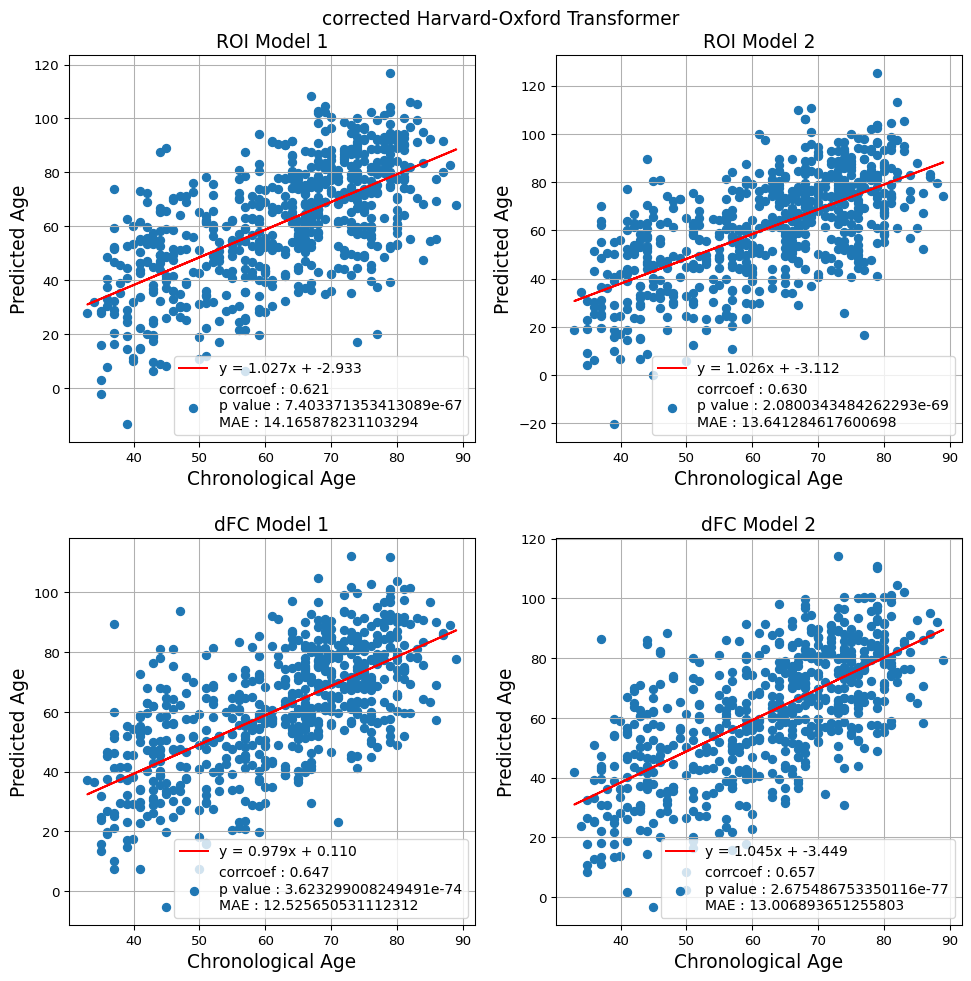

In [24]:
test_plot(test_pred_ho_corrected_1,
          test_pred_ho_corrected_2,
          test_pred_ho_dynamic_corrected_1,
          test_pred_ho_dynamic_corrected_2,
          test_label,'Corrected 1 Harvard-Oxford Transformer')

#### Corrected 2

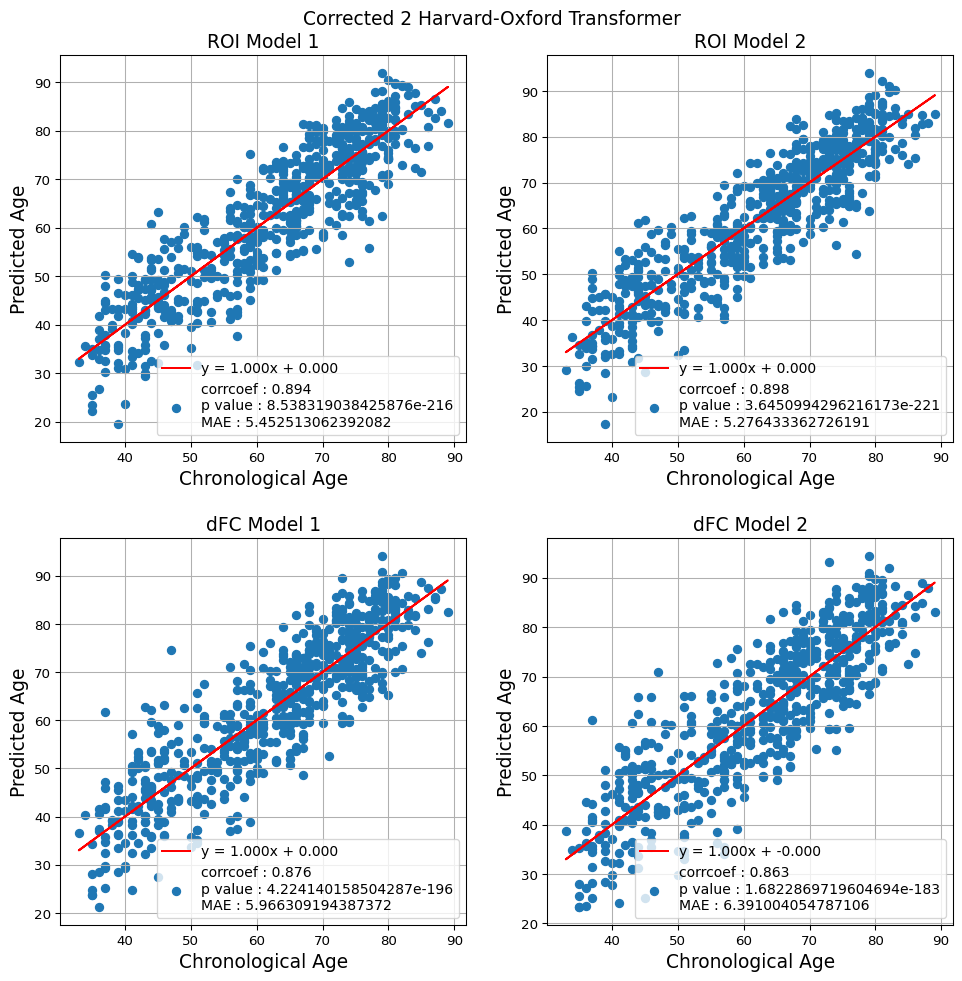

In [124]:
test_corrected_pred_ho_1,\
test_corrected_pred_ho_2,\
test_corrected_pred_ho_dynamic_1,\
test_corrected_pred_ho_dynamic_2 = corrected_predicted_age(test_pred_ho_1,
          test_pred_ho_2,
          test_pred_ho_dynamic_1,
          test_pred_ho_dynamic_2,
          test_label)

test_plot(test_corrected_pred_ho_1,
          test_corrected_pred_ho_2,
          test_corrected_pred_ho_dynamic_1,
          test_corrected_pred_ho_dynamic_2,
          test_label,'Corrected 2 Harvard-Oxford Transformer')

### Multi ALL

#### Normal

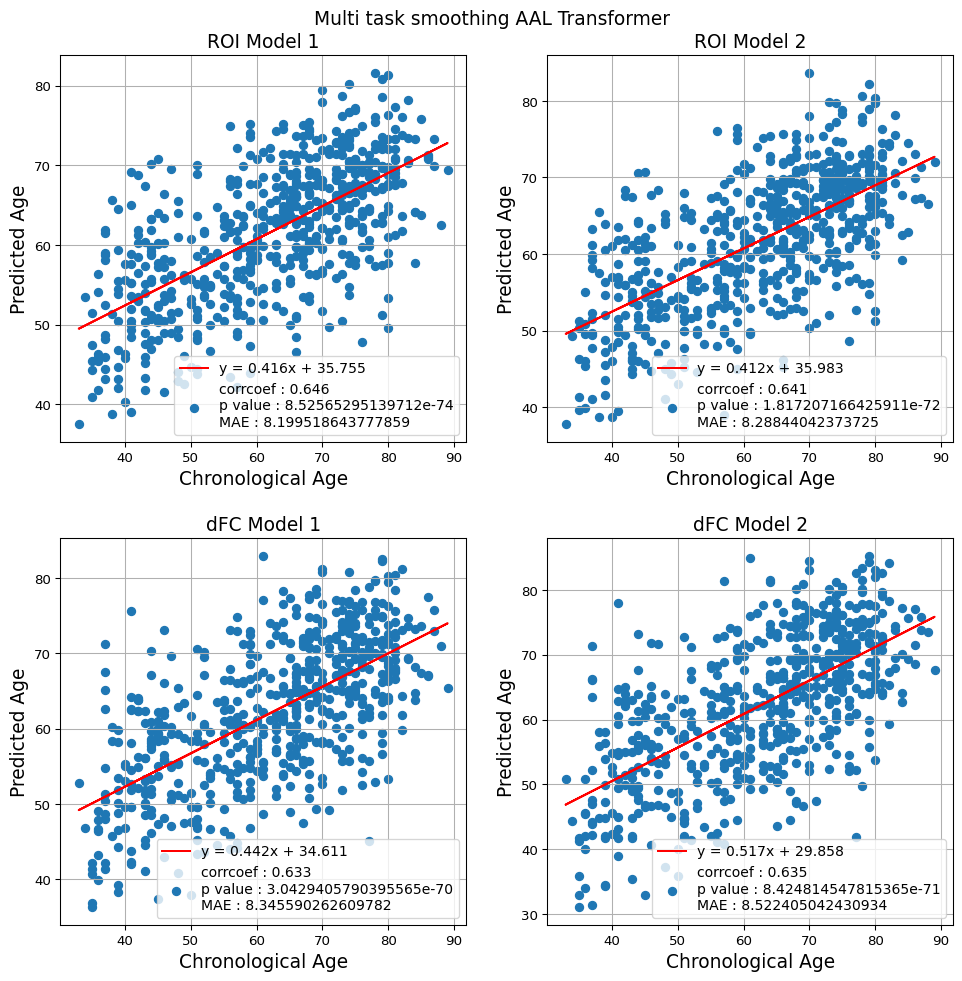

In [62]:
#test_plot(test_pred_multi_aal_1,
#          test_pred_multi_aal_2,
#          test_pred_multi_aal_dynamic_1,
#          test_pred_multi_aal_dynamic_2,
#          test_label,'Multi task AAL Transformer')

test_plot(test_pred_multi_smooth_aal_1,
          test_pred_multi_smooth_aal_2,
          test_pred_multi_smooth_aal_dynamic_1,
          test_pred_multi_smooth_aal_dynamic_2,
          test_label,'Multi task smoothing AAL Transformer')

#### Corrected 1

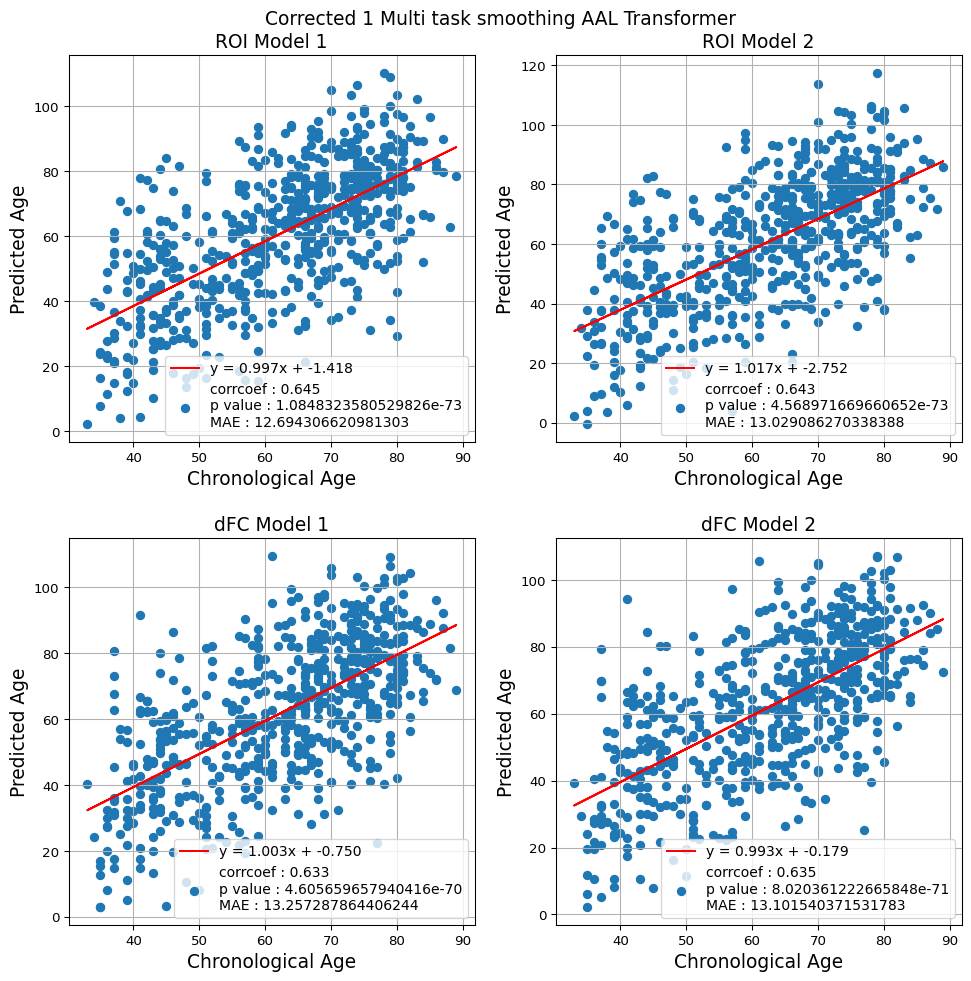

In [126]:
test_plot(test_pred_multi_smooth_aal_corrected_1,
          test_pred_multi_smooth_aal_corrected_2,
          test_pred_multi_smooth_aal_dynamic_corrected_1,
          test_pred_multi_smooth_aal_dynamic_corrected_2,
          test_label,'Corrected 1 Multi task smoothing AAL Transformer')

#### Corrected 2

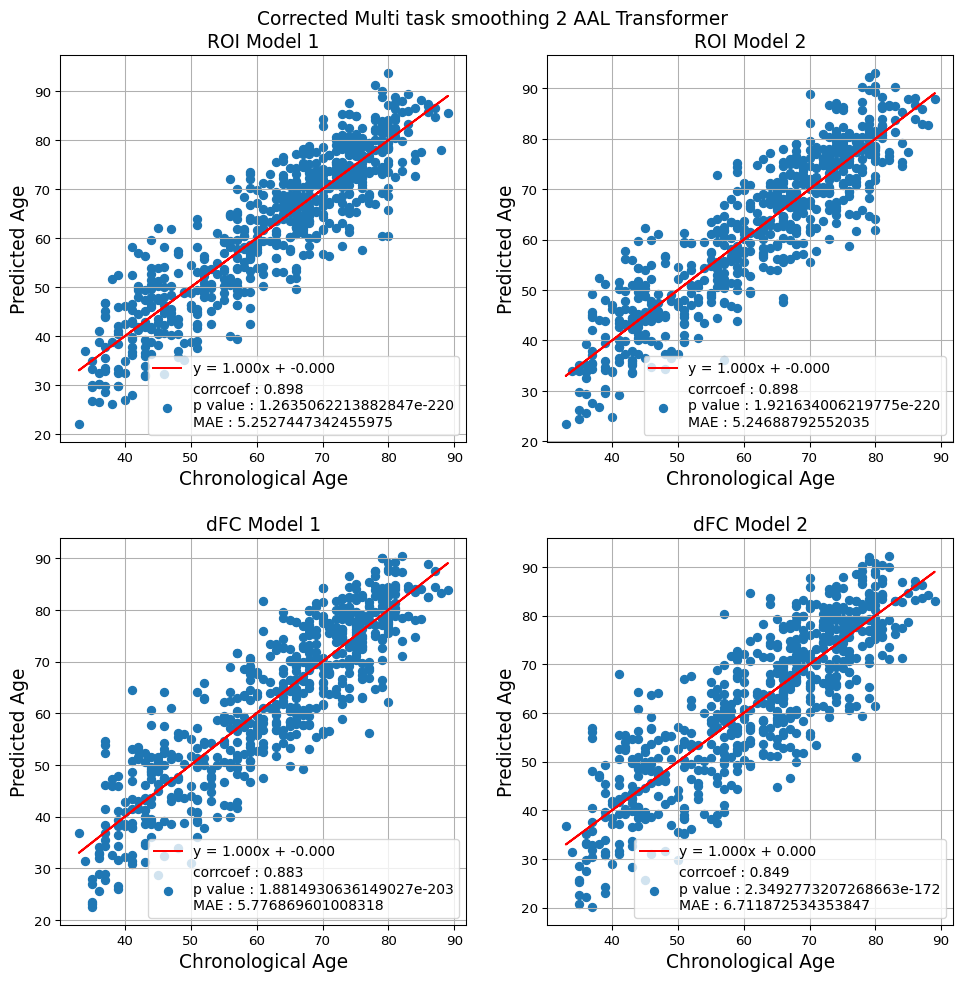

In [128]:
test_corrected_pred_multi_smooth_aal_1,\
test_corrected_pred_multi_smooth_aal_2,\
test_corrected_pred_multi_smooth_aal_dynamic_1,\
test_corrected_pred_multi_smooth_aal_dynamic_2 = corrected_predicted_age(test_pred_multi_smooth_aal_1,
          test_pred_multi_smooth_aal_2,
          test_pred_multi_smooth_aal_dynamic_1,
          test_pred_multi_smooth_aal_dynamic_2,
          test_label)

test_plot(test_corrected_pred_multi_smooth_aal_1,
          test_corrected_pred_multi_smooth_aal_2,
          test_corrected_pred_multi_smooth_aal_dynamic_1,
          test_corrected_pred_multi_smooth_aal_dynamic_2,
          test_label,'Corrected Multi task smoothing 2 AAL Transformer')

### Multi Harvard-Oxford

#### Normal

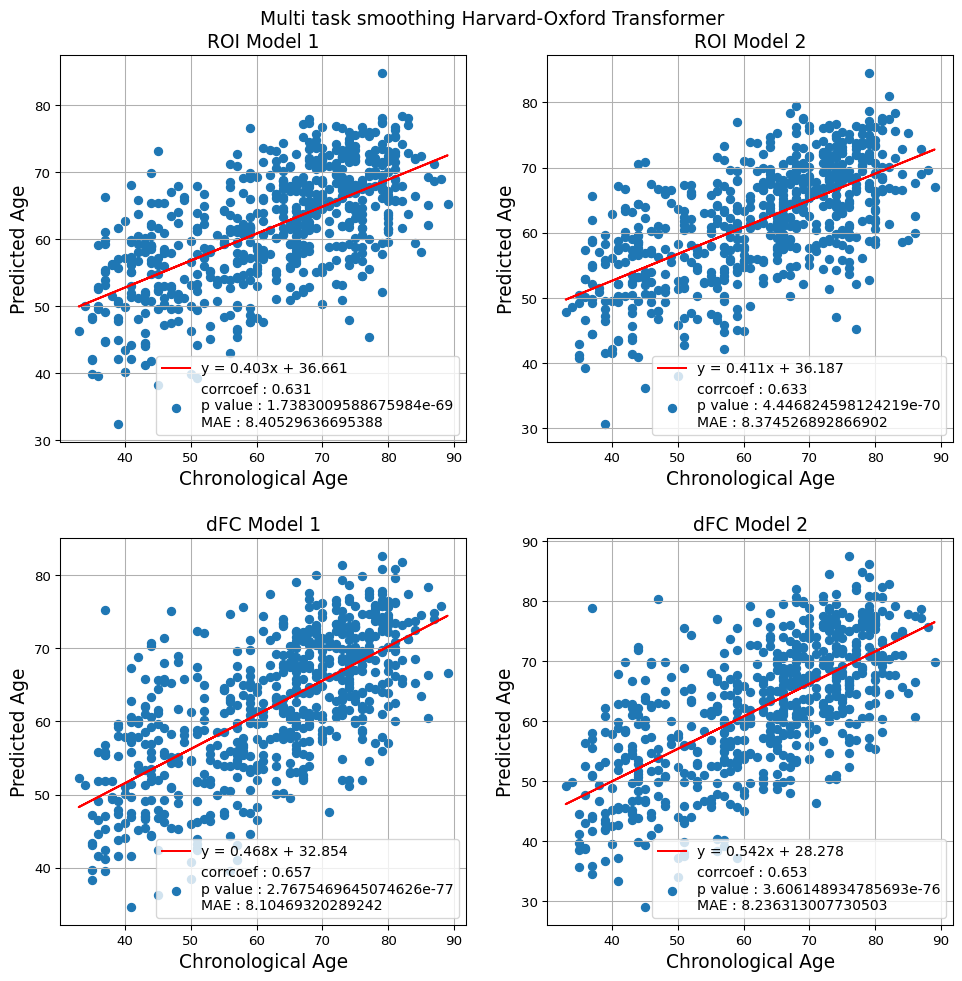

In [63]:
#test_plot(test_pred_multi_ho_1,
#          test_pred_multi_ho_2,
#          test_pred_multi_ho_dynamic_1,
#          test_pred_multi_ho_dynamic_2,
#          test_label,'Multi task Harvard-Oxford Transformer')

test_plot(test_pred_multi_smooth_ho_1,
          test_pred_multi_smooth_ho_2,
          test_pred_multi_smooth_ho_dynamic_1,
          test_pred_multi_smooth_ho_dynamic_2,
          test_label,'Multi task smoothing Harvard-Oxford Transformer')

#### Corrected 1

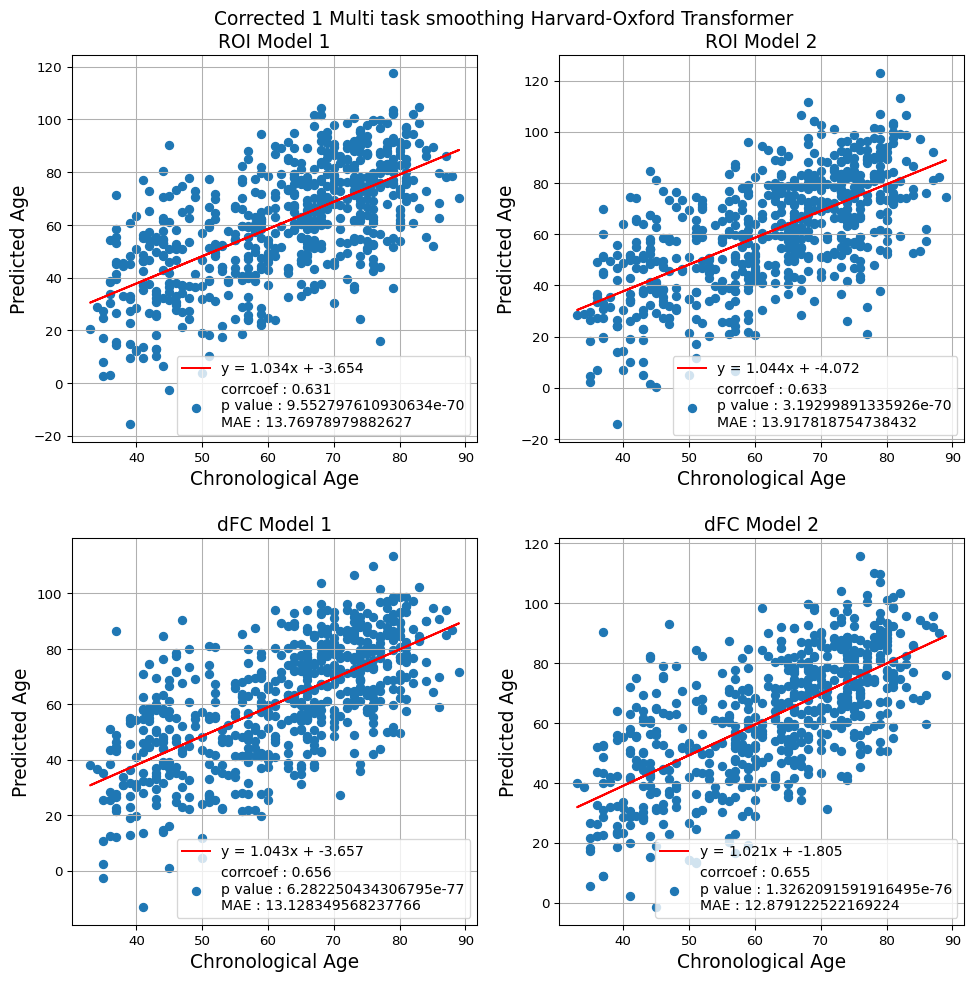

In [133]:
test_plot(test_pred_multi_smooth_ho_corrected_1,
          test_pred_multi_smooth_ho_corrected_2,
          test_pred_multi_smooth_ho_dynamic_corrected_1,
          test_pred_multi_smooth_ho_dynamic_corrected_2,
          test_label,'Corrected 1 Multi task smoothing Harvard-Oxford Transformer')

#### Corrected 2

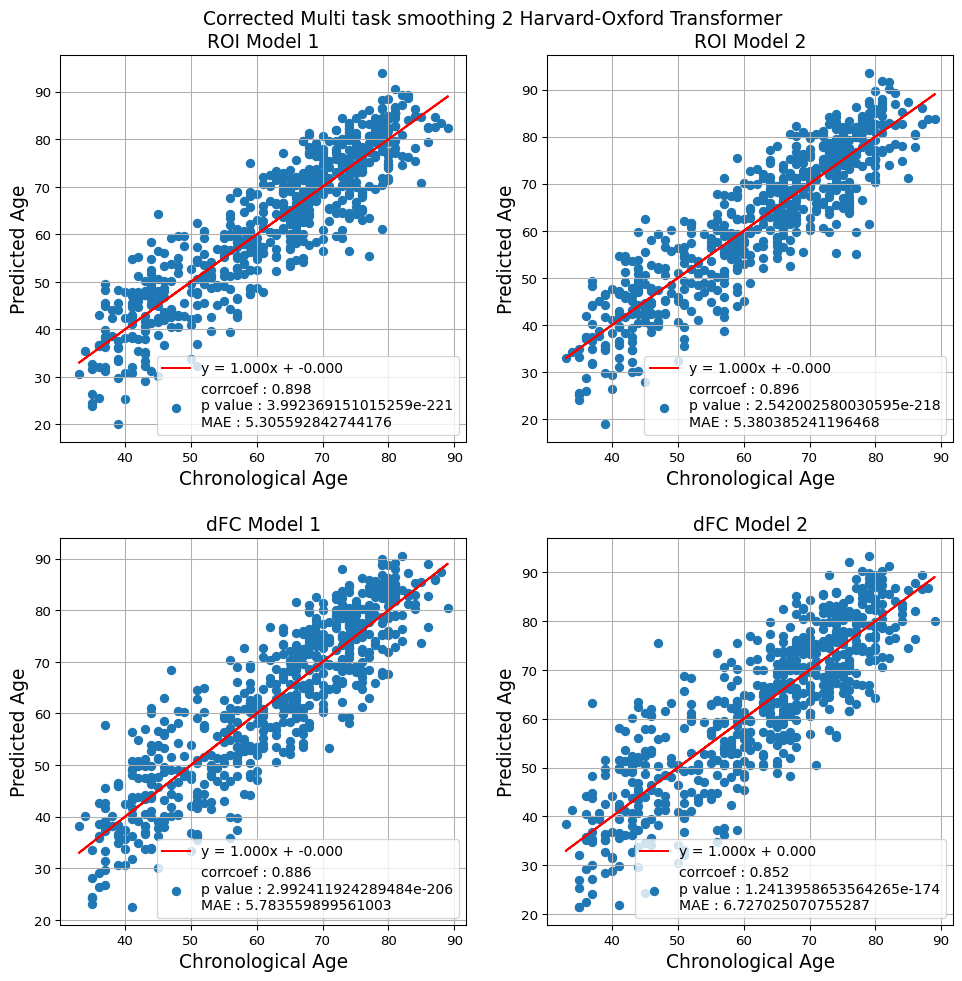

In [127]:
test_corrected_pred_multi_smooth_ho_1,\
test_corrected_pred_multi_smooth_ho_2,\
test_corrected_pred_multi_smooth_ho_dynamic_1,\
test_corrected_pred_multi_smooth_ho_dynamic_2 = corrected_predicted_age(test_pred_multi_smooth_ho_1,
          test_pred_multi_smooth_ho_2,
          test_pred_multi_smooth_ho_dynamic_1,
          test_pred_multi_smooth_ho_dynamic_2,
          test_label)

test_plot(test_corrected_pred_multi_smooth_ho_1,
          test_corrected_pred_multi_smooth_ho_2,
          test_corrected_pred_multi_smooth_ho_dynamic_1,
          test_corrected_pred_multi_smooth_ho_dynamic_2,
          test_label,'Corrected Multi task smoothing 2 Harvard-Oxford Transformer')

### LSTM AAL

#### Normal

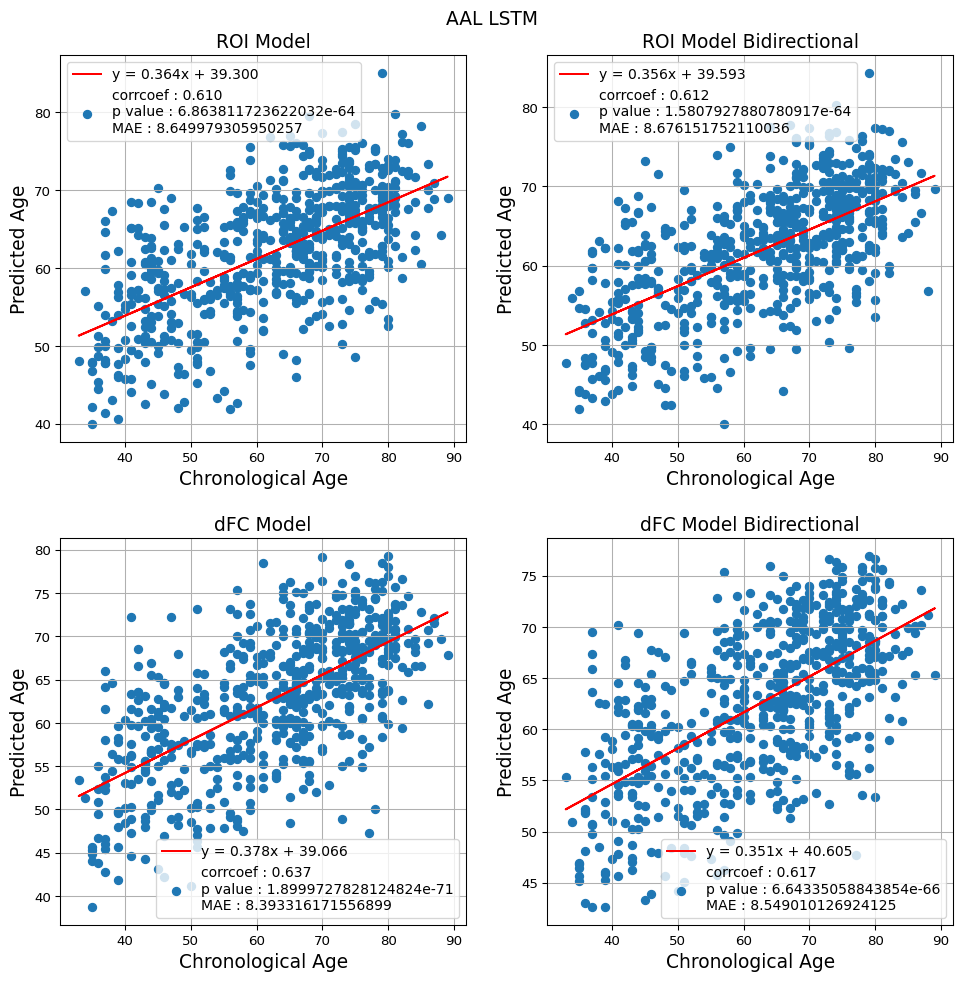

In [30]:
test_plot(test_pred_aal_lstm,
          test_pred_aal_lstm_bi,
          test_pred_aal_dynamic_lstm,
          test_pred_aal_dynamic_lstm_bi,
          test_label,'AAL LSTM')

#### Corrected 1

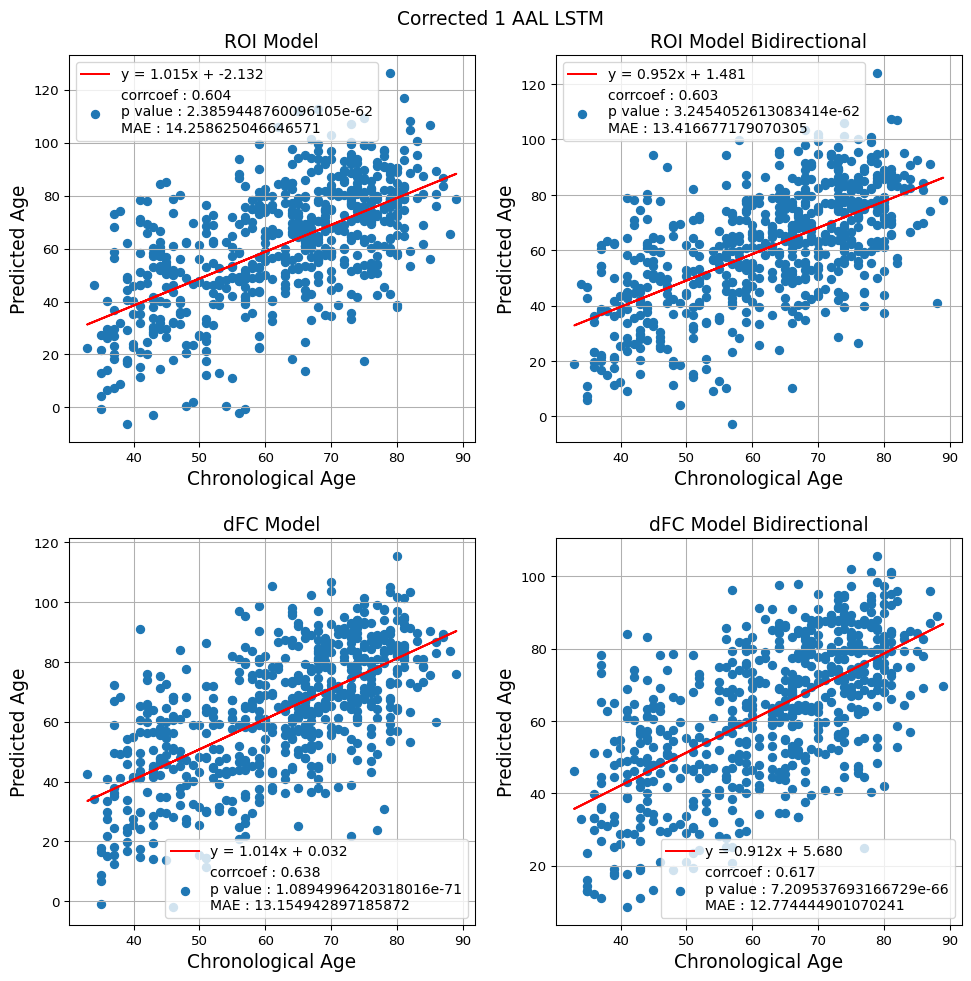

In [129]:
test_plot(test_pred_aal_corrected_lstm,
          test_pred_aal_corrected_lstm_bi,
          test_pred_aal_dynamic_corrected_lstm,
          test_pred_aal_dynamic_corrected_lstm_bi,
          test_label,'Corrected 1 AAL LSTM')

#### Corrected 2

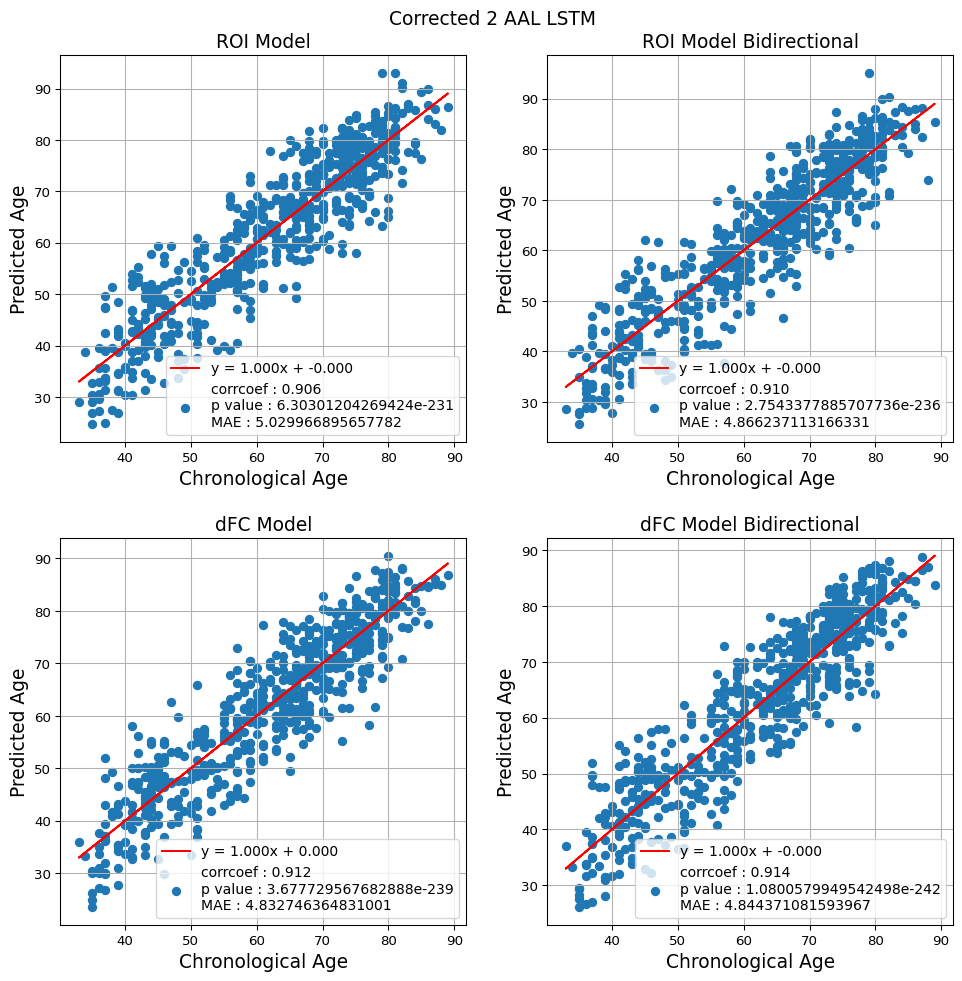

In [131]:
test_corrected_pred_aal_lstm,\
test_corrected_pred_aal_lstm_bi,\
test_corrected_pred_aal_dynamic_lstm,\
test_corrected_pred_aal_dynamic_lstm_bi = corrected_predicted_age(test_pred_aal_lstm,
          test_pred_aal_lstm_bi,
          test_pred_aal_dynamic_lstm,
          test_pred_aal_dynamic_lstm_bi,
          test_label)

test_plot(test_corrected_pred_aal_lstm,
          test_corrected_pred_aal_lstm_bi,
          test_corrected_pred_aal_dynamic_lstm,
          test_corrected_pred_aal_dynamic_lstm_bi,
          test_label,'Corrected 2 AAL LSTM')

### LSTM Harvard-Oxford

#### Normal

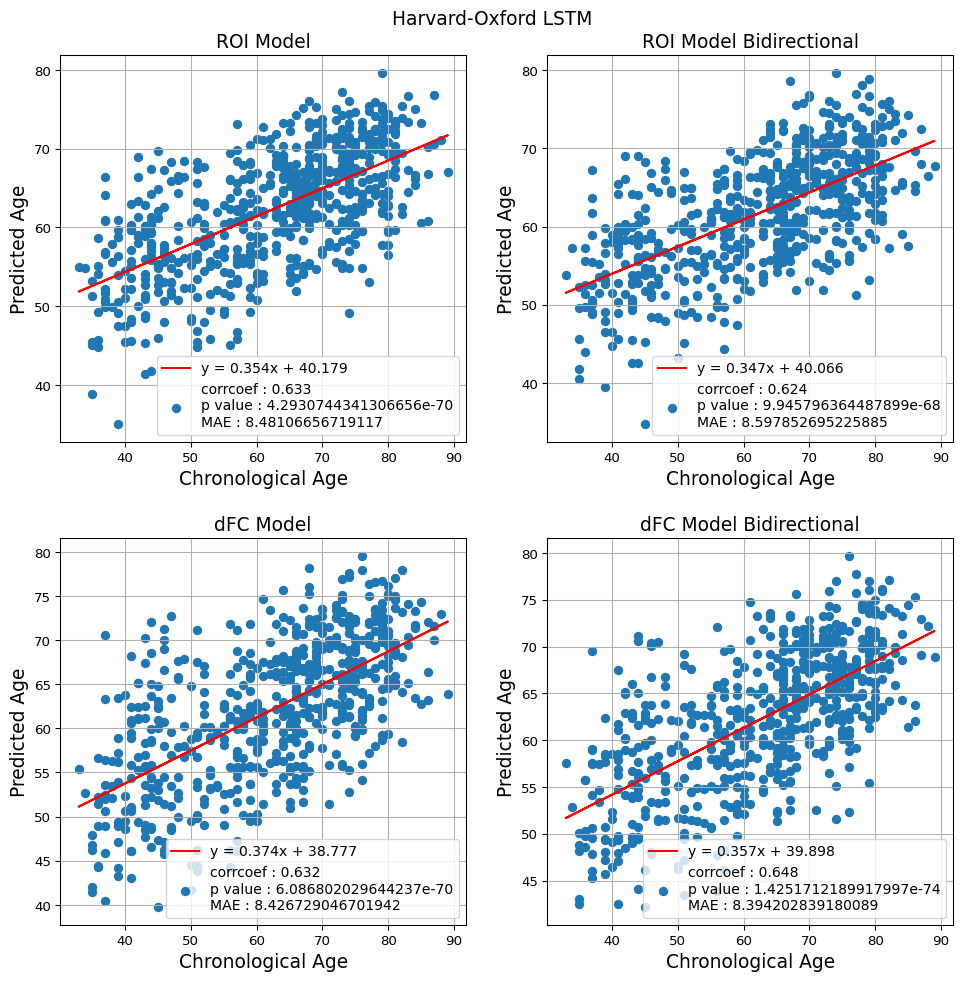

In [32]:
test_plot(test_pred_ho_lstm,
          test_pred_ho_lstm_bi,
          test_pred_ho_dynamic_lstm,
          test_pred_ho_dynamic_lstm_bi,
          test_label,'Harvard-Oxford LSTM')

#### Corrected 1

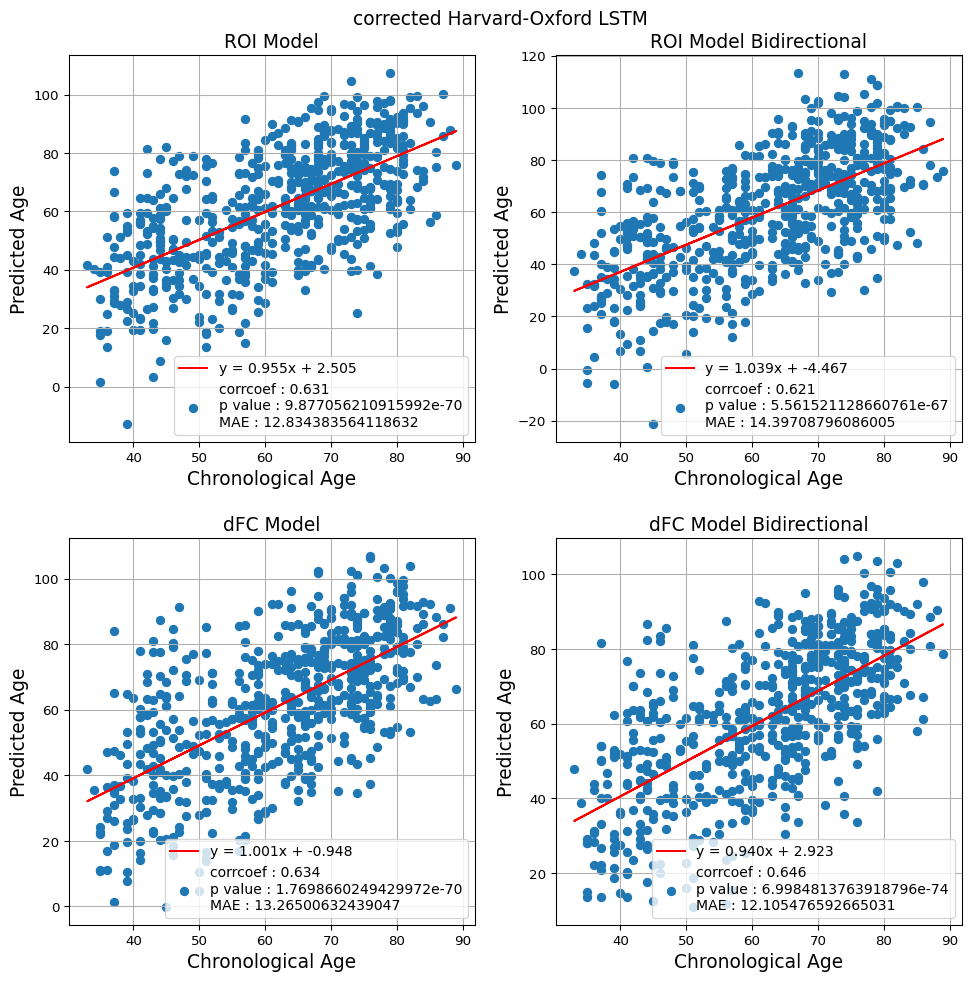

In [33]:
test_plot(test_pred_ho_corrected_lstm,
          test_pred_ho_corrected_lstm_bi,
          test_pred_ho_dynamic_corrected_lstm,
          test_pred_ho_dynamic_corrected_lstm_bi,
          test_label,'Corrected 1 Harvard-Oxford LSTM')

#### Corrected 2

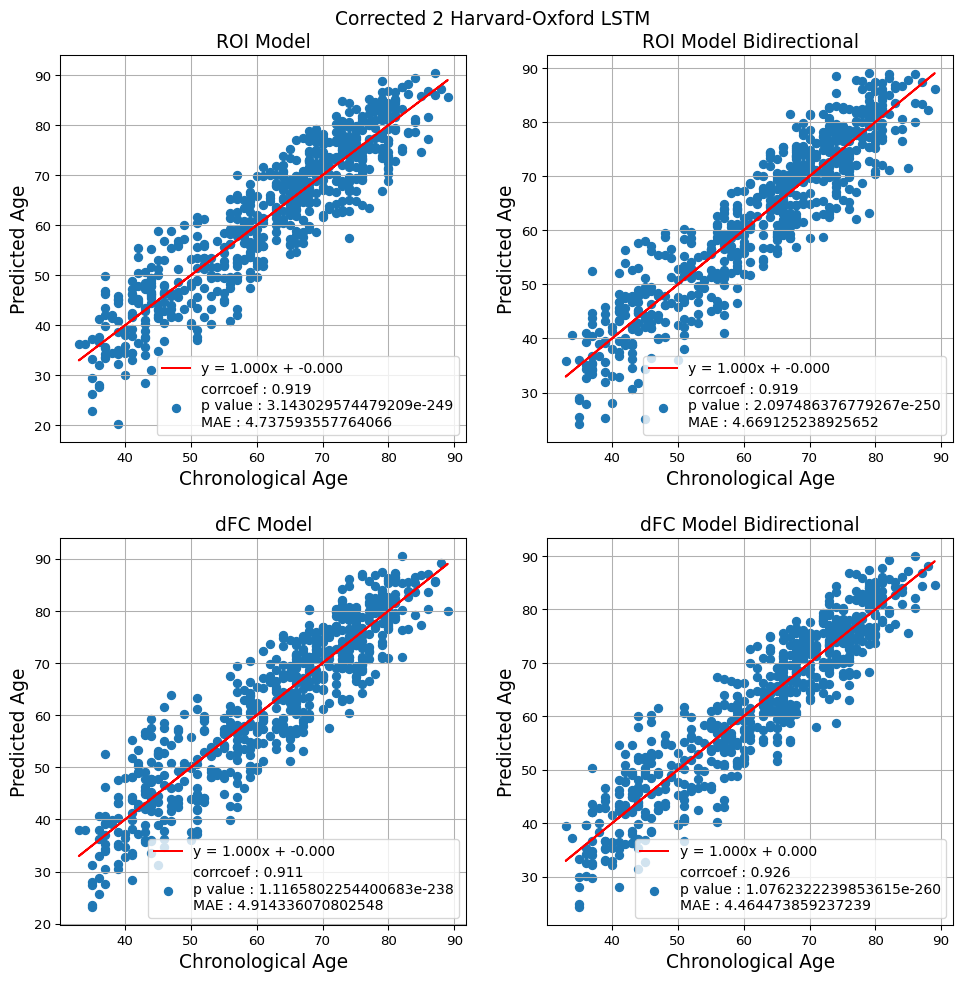

In [132]:
test_corrected_pred_ho_lstm,\
test_corrected_pred_ho_lstm_bi,\
test_corrected_pred_ho_dynamic_lstm,\
test_corrected_pred_ho_dynamic_lstm_bi = corrected_predicted_age(test_pred_ho_lstm,
          test_pred_ho_lstm_bi,
          test_pred_ho_dynamic_lstm,
          test_pred_ho_dynamic_lstm_bi,
          test_label)

test_plot(test_corrected_pred_ho_lstm,
          test_corrected_pred_ho_lstm_bi,
          test_corrected_pred_ho_dynamic_lstm,
          test_corrected_pred_ho_dynamic_lstm_bi,
          test_label,'Corrected 2 Harvard-Oxford LSTM')

## やる気スコアとの相関

In [34]:
def test_compare(preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2,
                 labels,
                 title='',
                 test_idxs = test_idx):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    fig, axs = plt.subplots(4, 3, figsize=(15, 24), dpi=96)
    fig.suptitle(title, fontsize=16, x=0.5, y=0.92)   # 図のタイトル
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    
    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,0:1]
            else:
                label = np.concatenate([label,labels[i,:,0:1]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,0:1]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
        for i in range(n_splits):
            if not i:
                test_idx = test_idxs[i]
            else:
                test_idx = np.concatenate([test_idx,test_idxs[i]])
                
        if n == 0:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'
            
        new_line = '\n'

        lr = LinearRegression()
        lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
        label_pred = lr.predict(label*age_std+age_mean)

        label = label.reshape(-1)
        label = label*age_std+age_mean
        pred  = pred.reshape(-1)
        pred  = pred*age_std+age_mean 
        diff  = pred - label_pred
    
        corr_diff,p_diff = pearsonr(diff,data_label[test_idx][:,2])
        corr_pred,p_pred = pearsonr(pred,data_label[test_idx][:,2])
        corr_label,p_label = pearsonr(label_pred,data_label[test_idx][:,2])
        
        axs[n,0].scatter(label_pred,data_label[test_idx][:,2],
                   label = f'corrcoef label: {corr_label:.3f},p value : {p_label:.3f}')#散布図をプロット
        plt.axes(axs[n,0])
        plt.xlabel('Chronological Age', fontsize=14)    # x軸のラベル
        plt.ylabel('apathy scale', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示

        axs[n,1].scatter(pred,data_label[test_idx][:,2],
                   label = f'corrcoef pred: {corr_pred:.3f},p value : {p_pred:.3f}')#散布図をプロット
        plt.axes(axs[n,1])
        plt.xlabel('Corrcted Predicted Age', fontsize=14)    # x軸のラベル
        plt.ylabel('apathy scale', fontsize=14)  # y軸のラベル
        plt.title(tit, fontsize=14)
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示

        axs[n,2].scatter(diff,data_label[test_idx][:,2],
                   label = f'corrcoef diff: {corr_diff:.3f},p value : {p_diff:.3f}')#散布図をプロット
        plt.axes(axs[n,2])
        plt.xlabel('Corrcted Predicted Age - Chronological Age', fontsize=14)    # x軸のラベル
        plt.ylabel('apathy scale', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        

    plt.show()
    
    path = '../04_result/image/'
    title = title.split()
    for s in title:
        path += s + '_'
    path = path[:-1] + '.png'

    fig.savefig(path)

### AAL

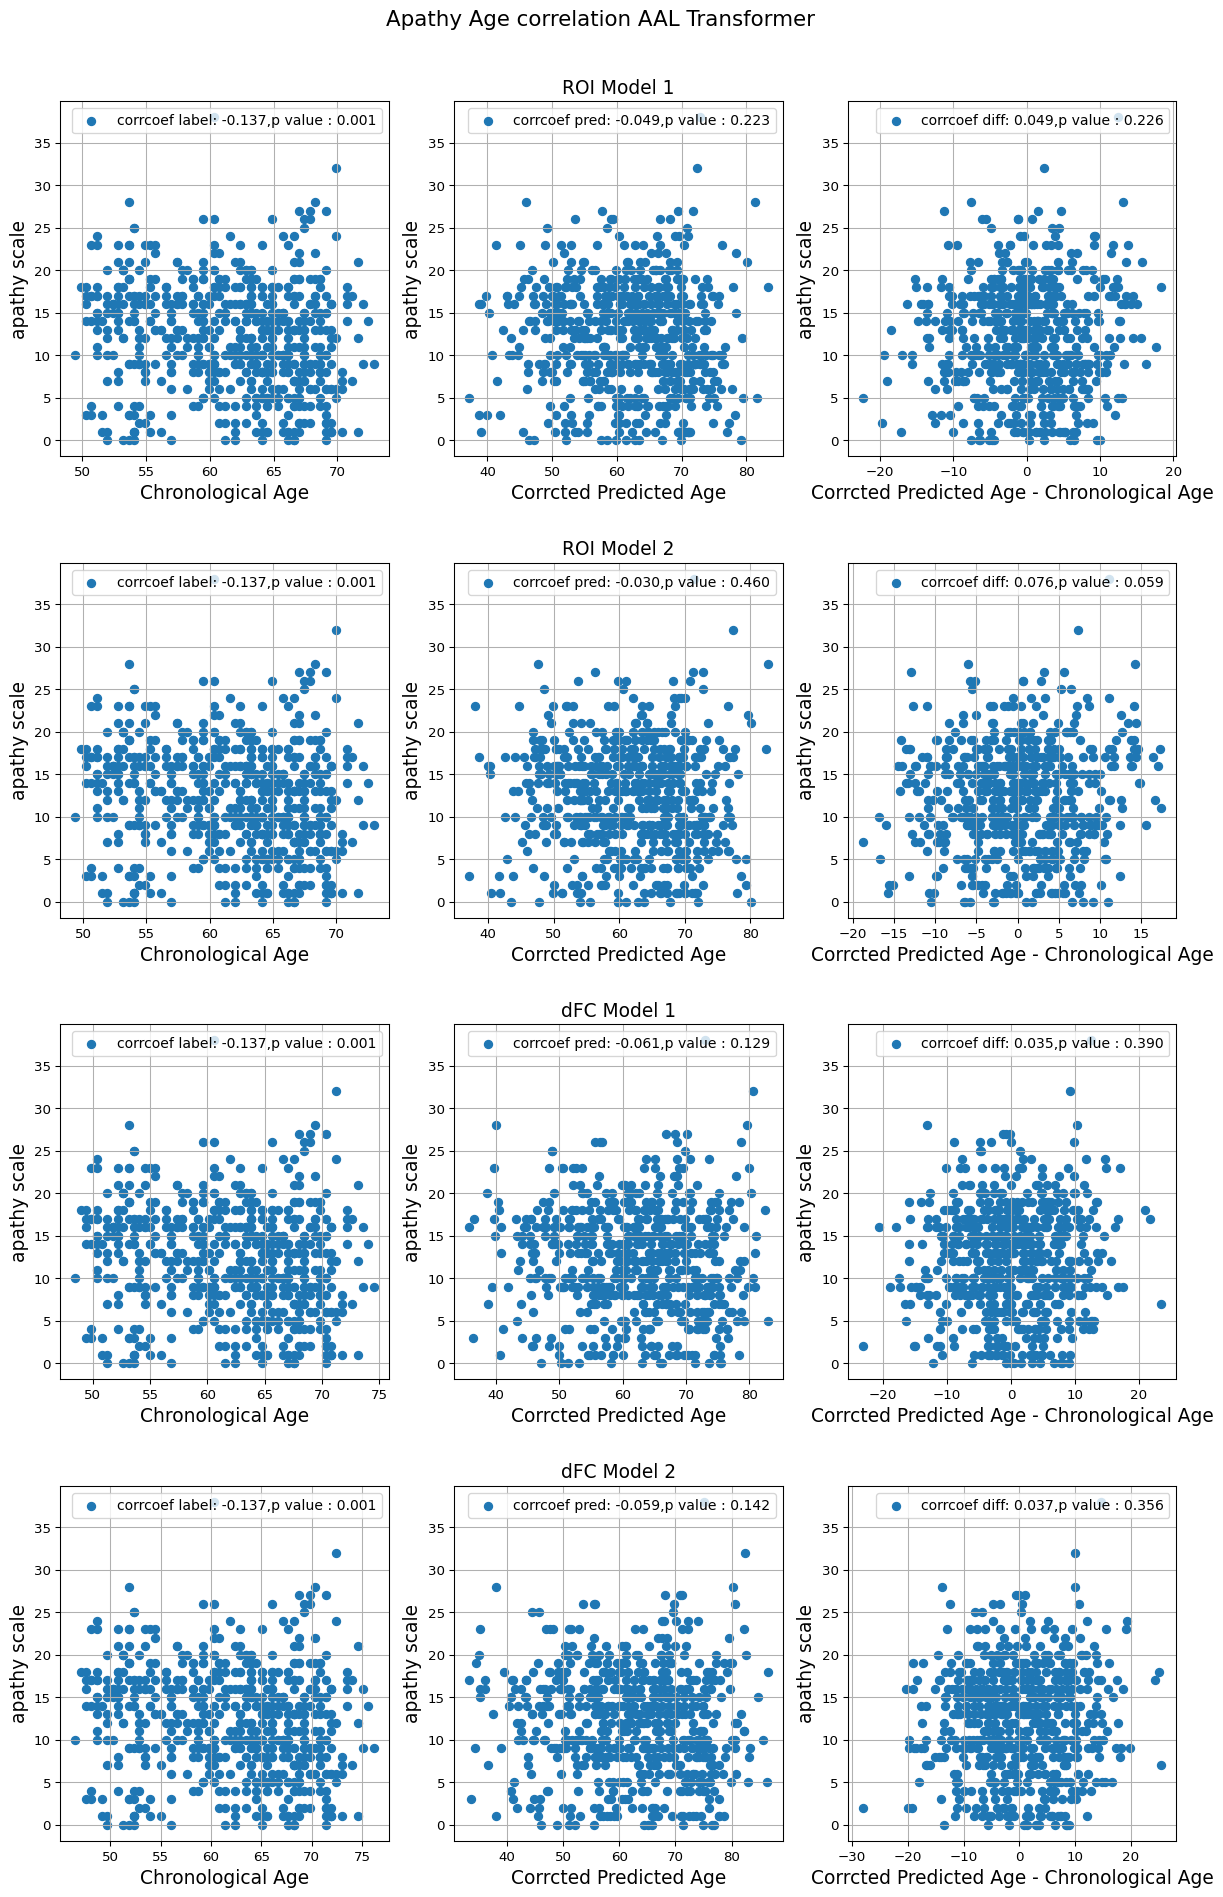

In [35]:
test_compare(test_pred_aal_1,
             test_pred_aal_2,
             test_pred_aal_dynamic_1,
             test_pred_aal_dynamic_2,
             test_label,
             'Apathy Age correlation AAL Transformer')

### Harvard-Oxford

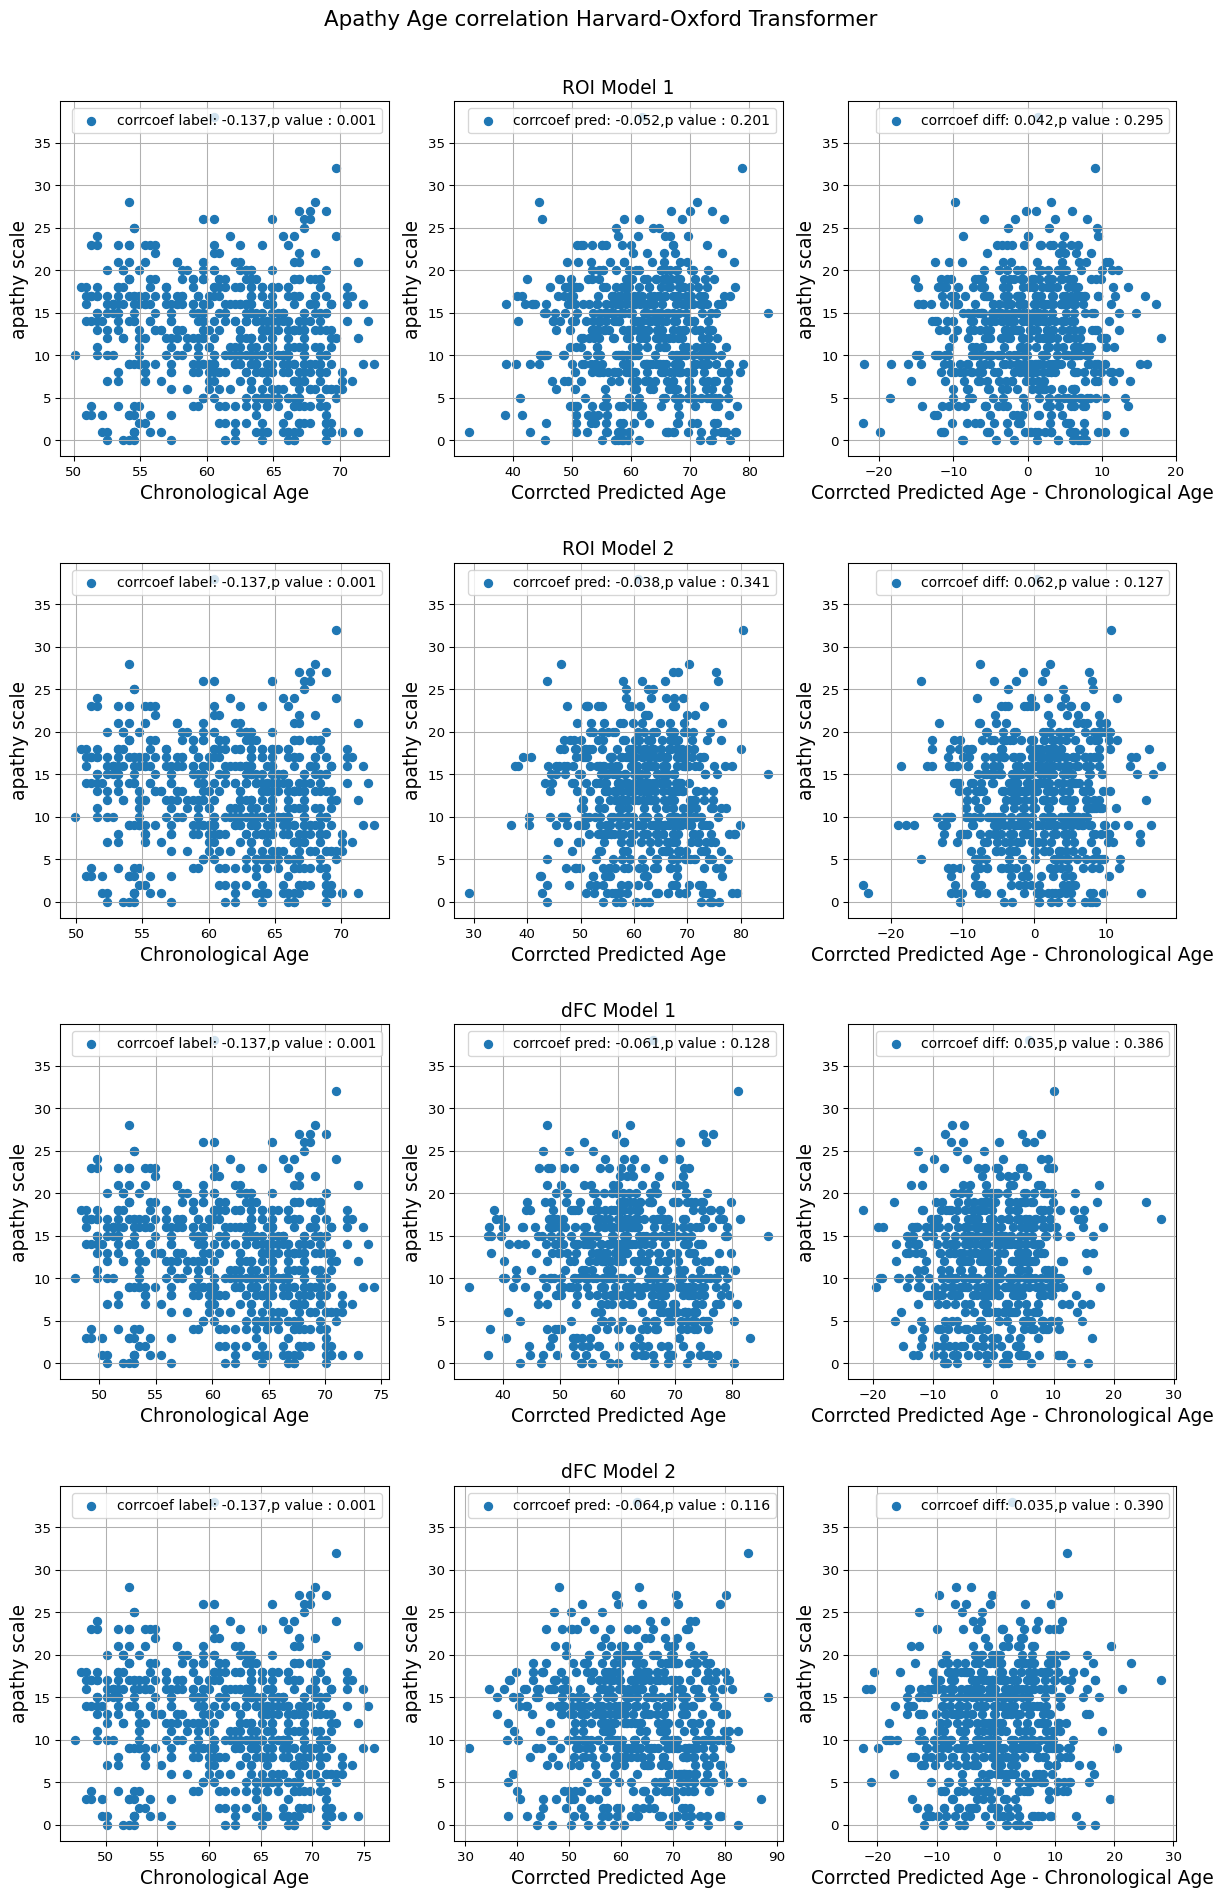

In [36]:
test_compare(test_pred_ho_1,
             test_pred_ho_2,
             test_pred_ho_dynamic_1,
             test_pred_ho_dynamic_2,
             test_label,
             'Apathy Age correlation Harvard-Oxford Transformer')

### Multi AAL

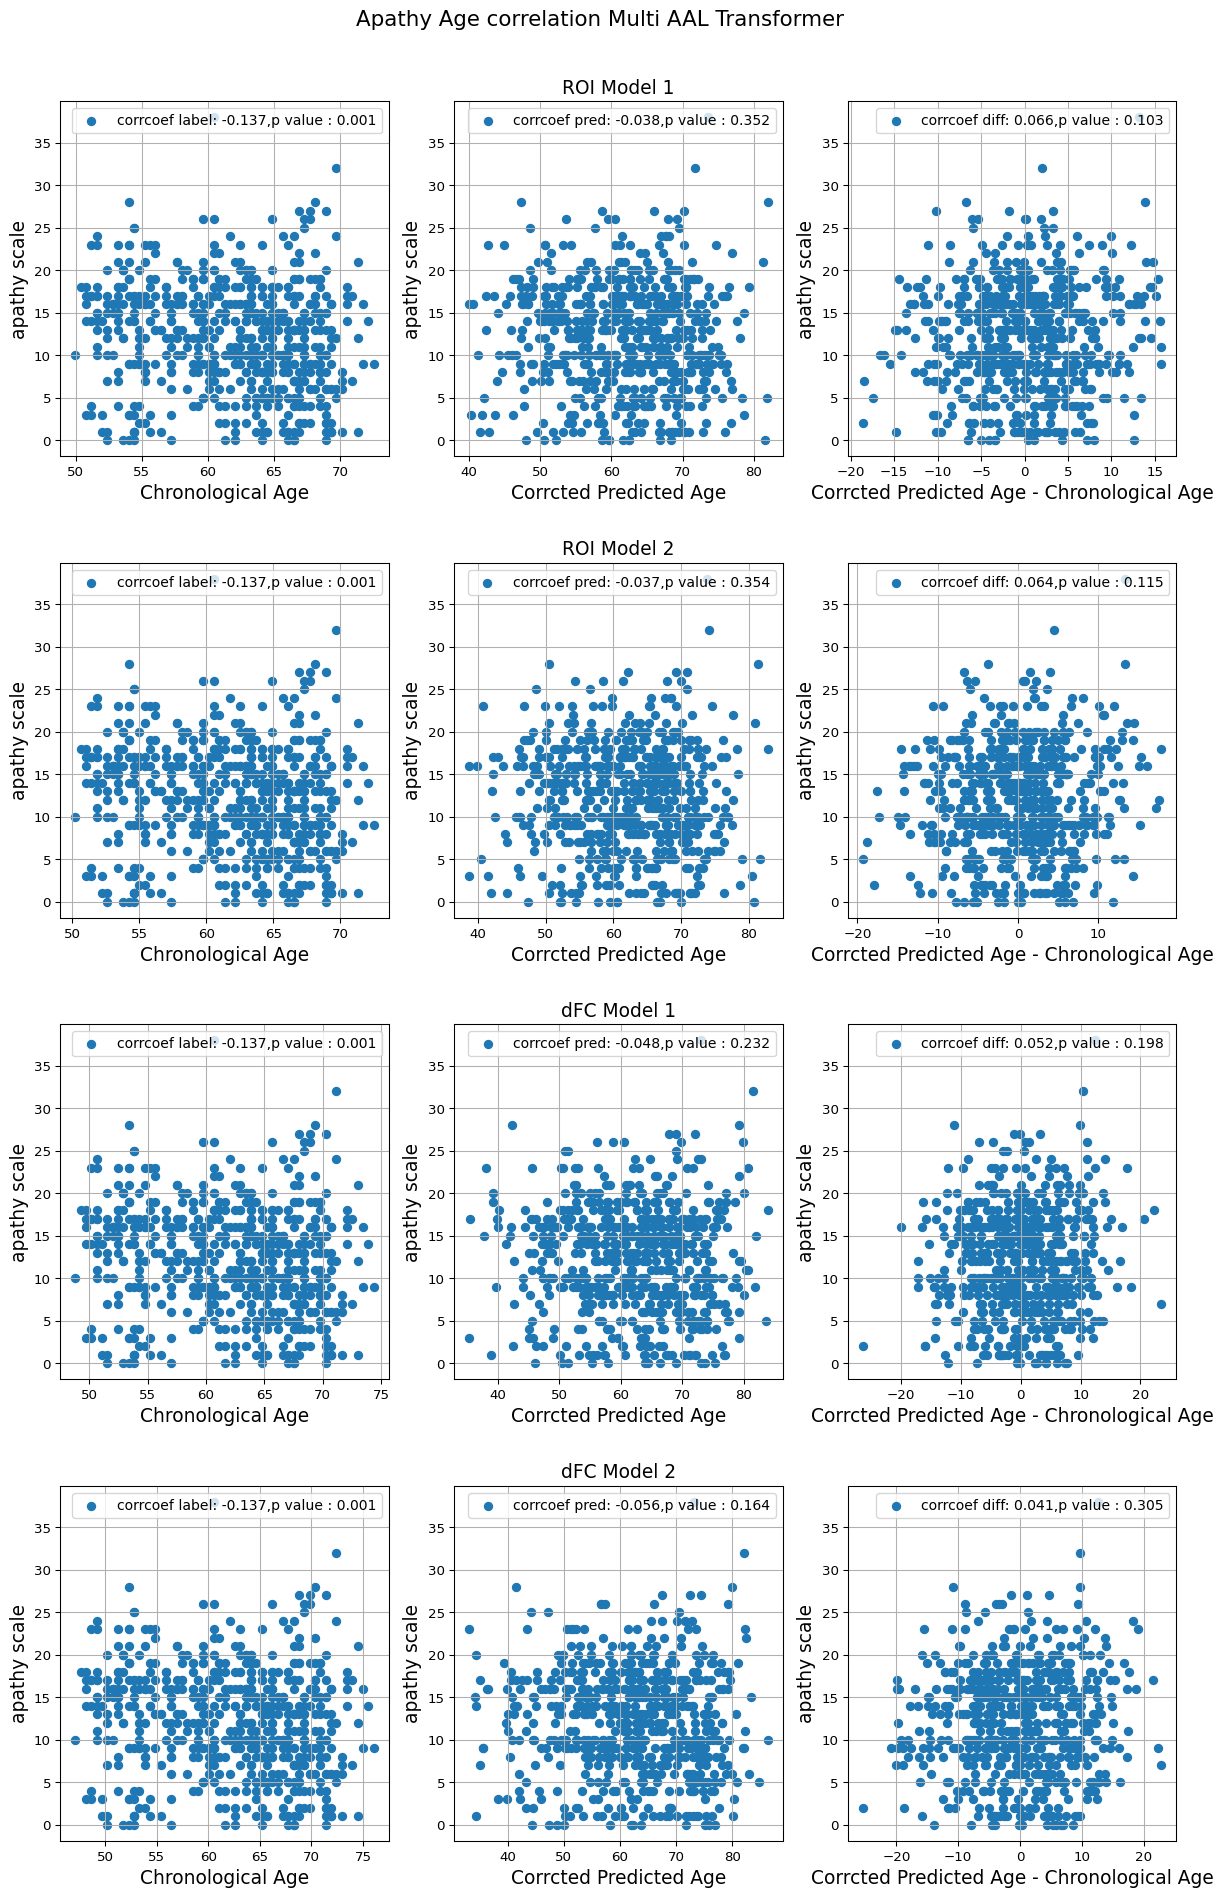

In [37]:
test_compare(test_pred_multi_aal_1,
             test_pred_multi_aal_2,
             test_pred_multi_aal_dynamic_1,
             test_pred_multi_aal_dynamic_2,
             test_label,
             'Apathy Age correlation Multi AAL Transformer')

### Multi Harvard-Oxford

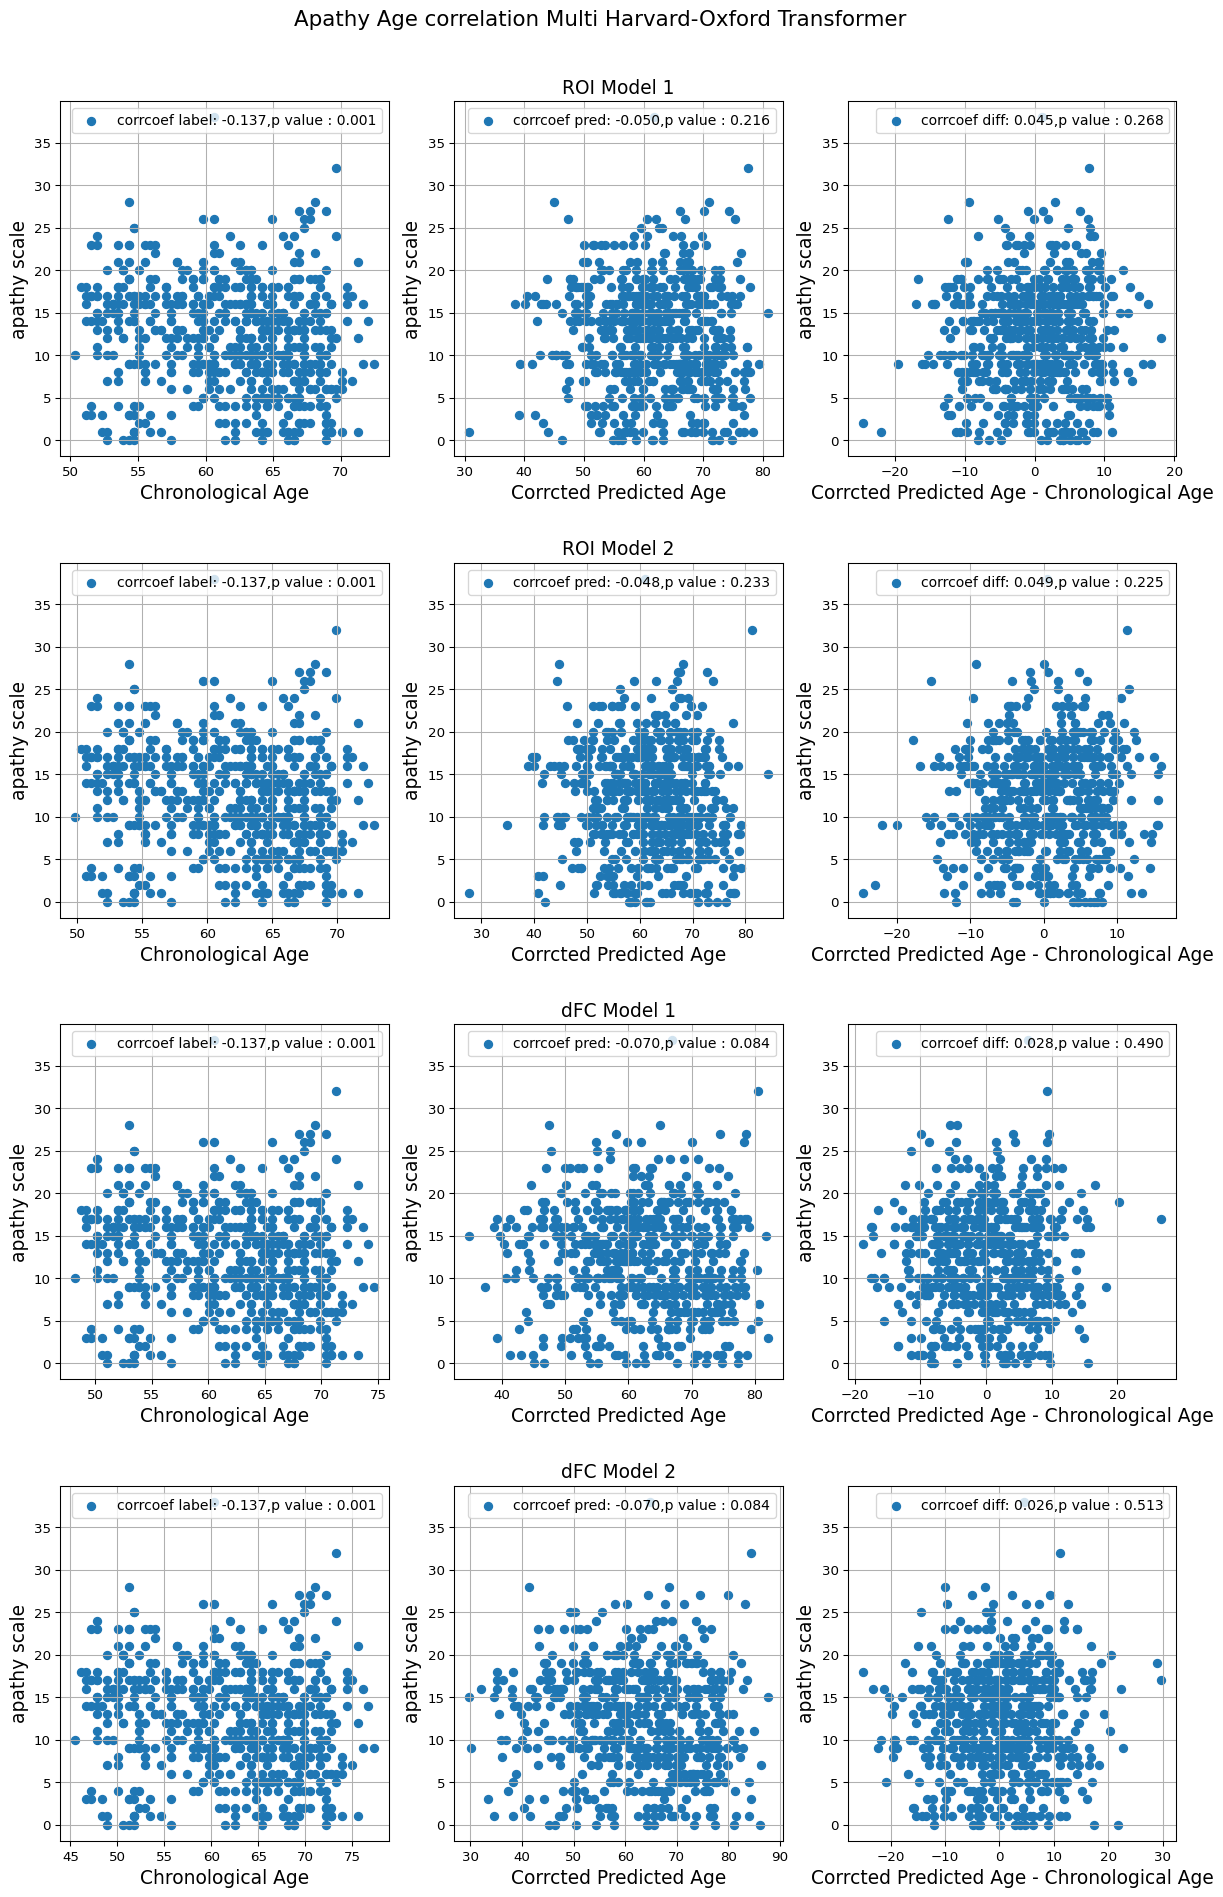

In [38]:
test_compare(test_pred_multi_ho_1,
             test_pred_multi_ho_2,
             test_pred_multi_ho_dynamic_1,
             test_pred_multi_ho_dynamic_2,
             test_label,
             'Apathy Age correlation Multi Harvard-Oxford Transformer')

### LSTM AAL

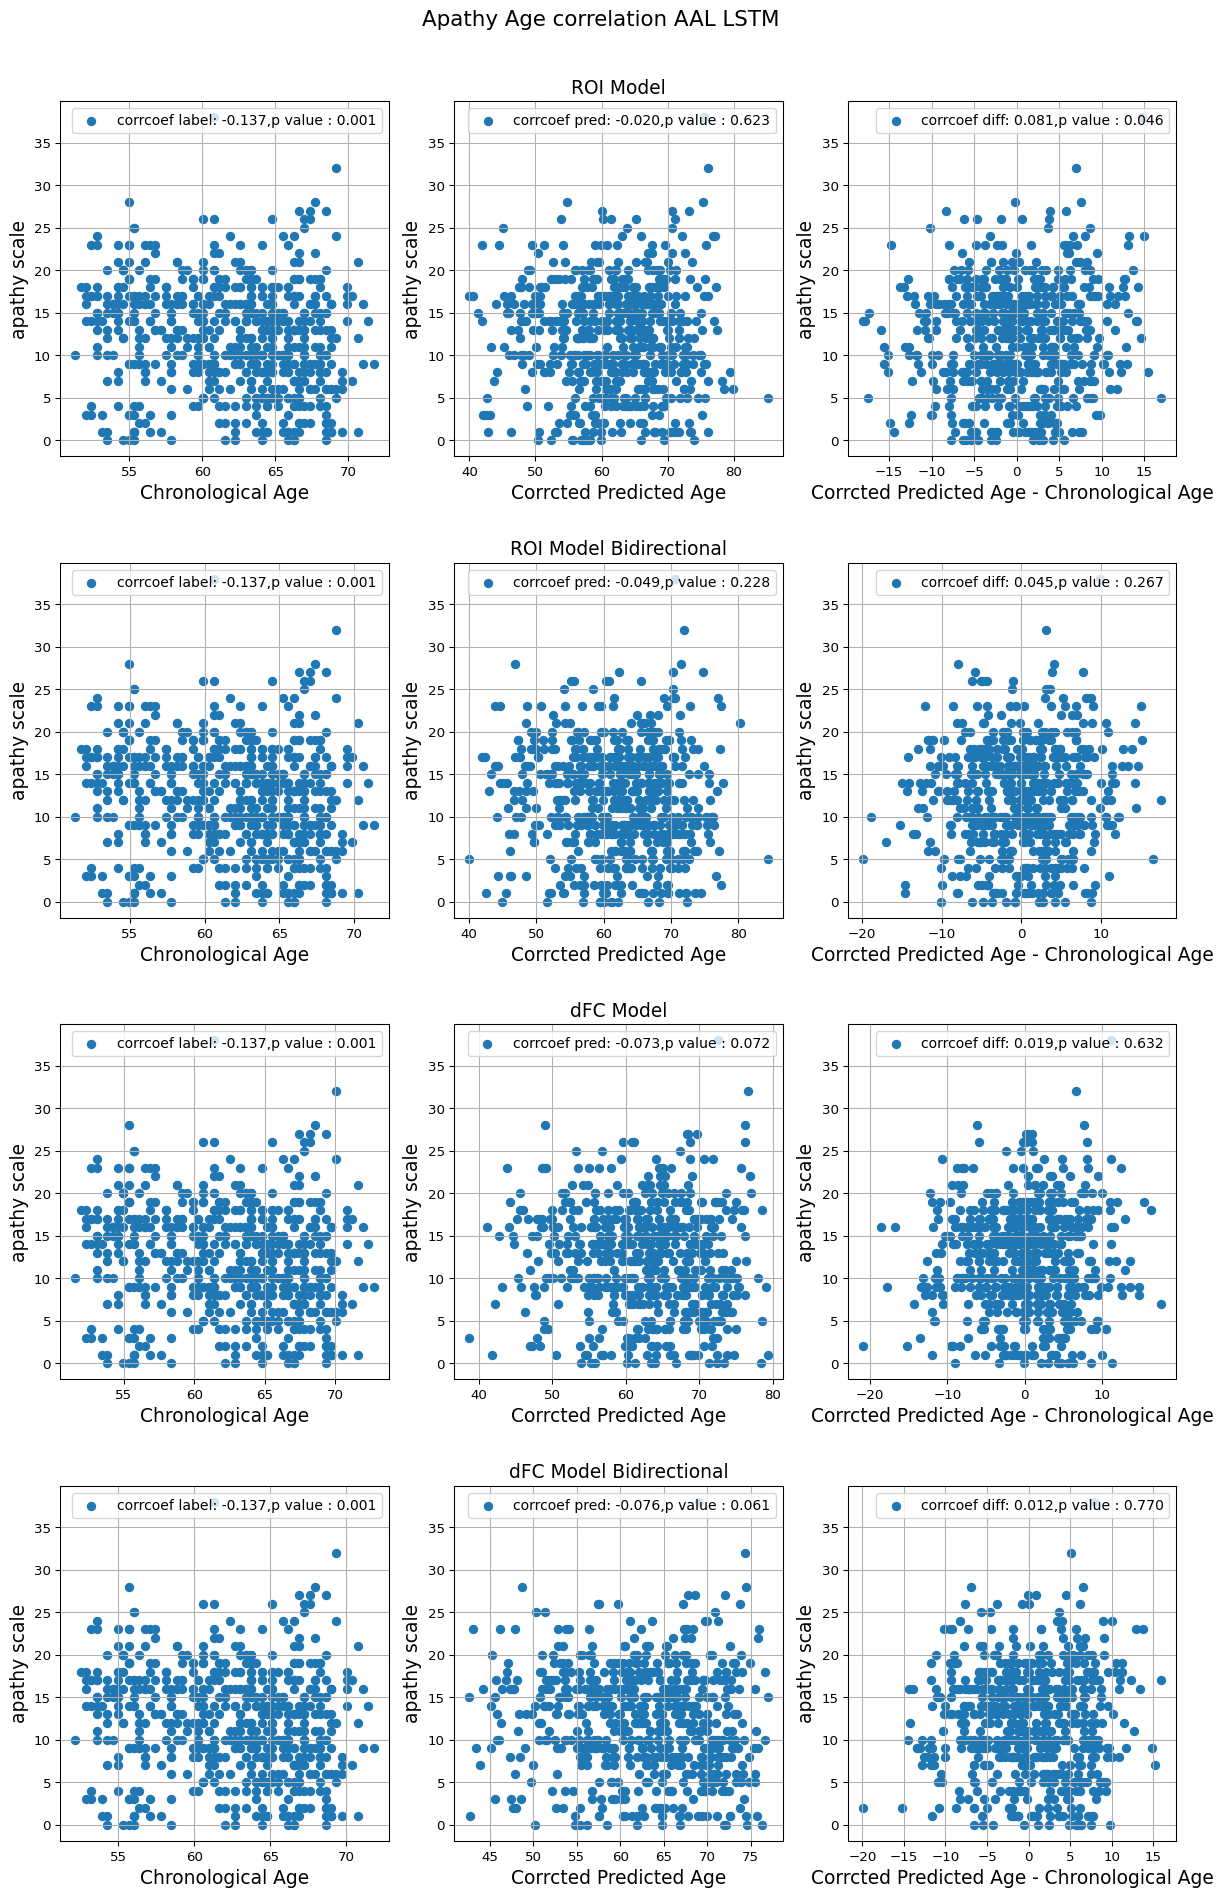

In [39]:
test_compare(test_pred_aal_lstm,
             test_pred_aal_lstm_bi,
             test_pred_aal_dynamic_lstm,
             test_pred_aal_dynamic_lstm_bi,
             test_label,
             'Apathy Age correlation AAL LSTM')

### LSTM Harvard-Oxford

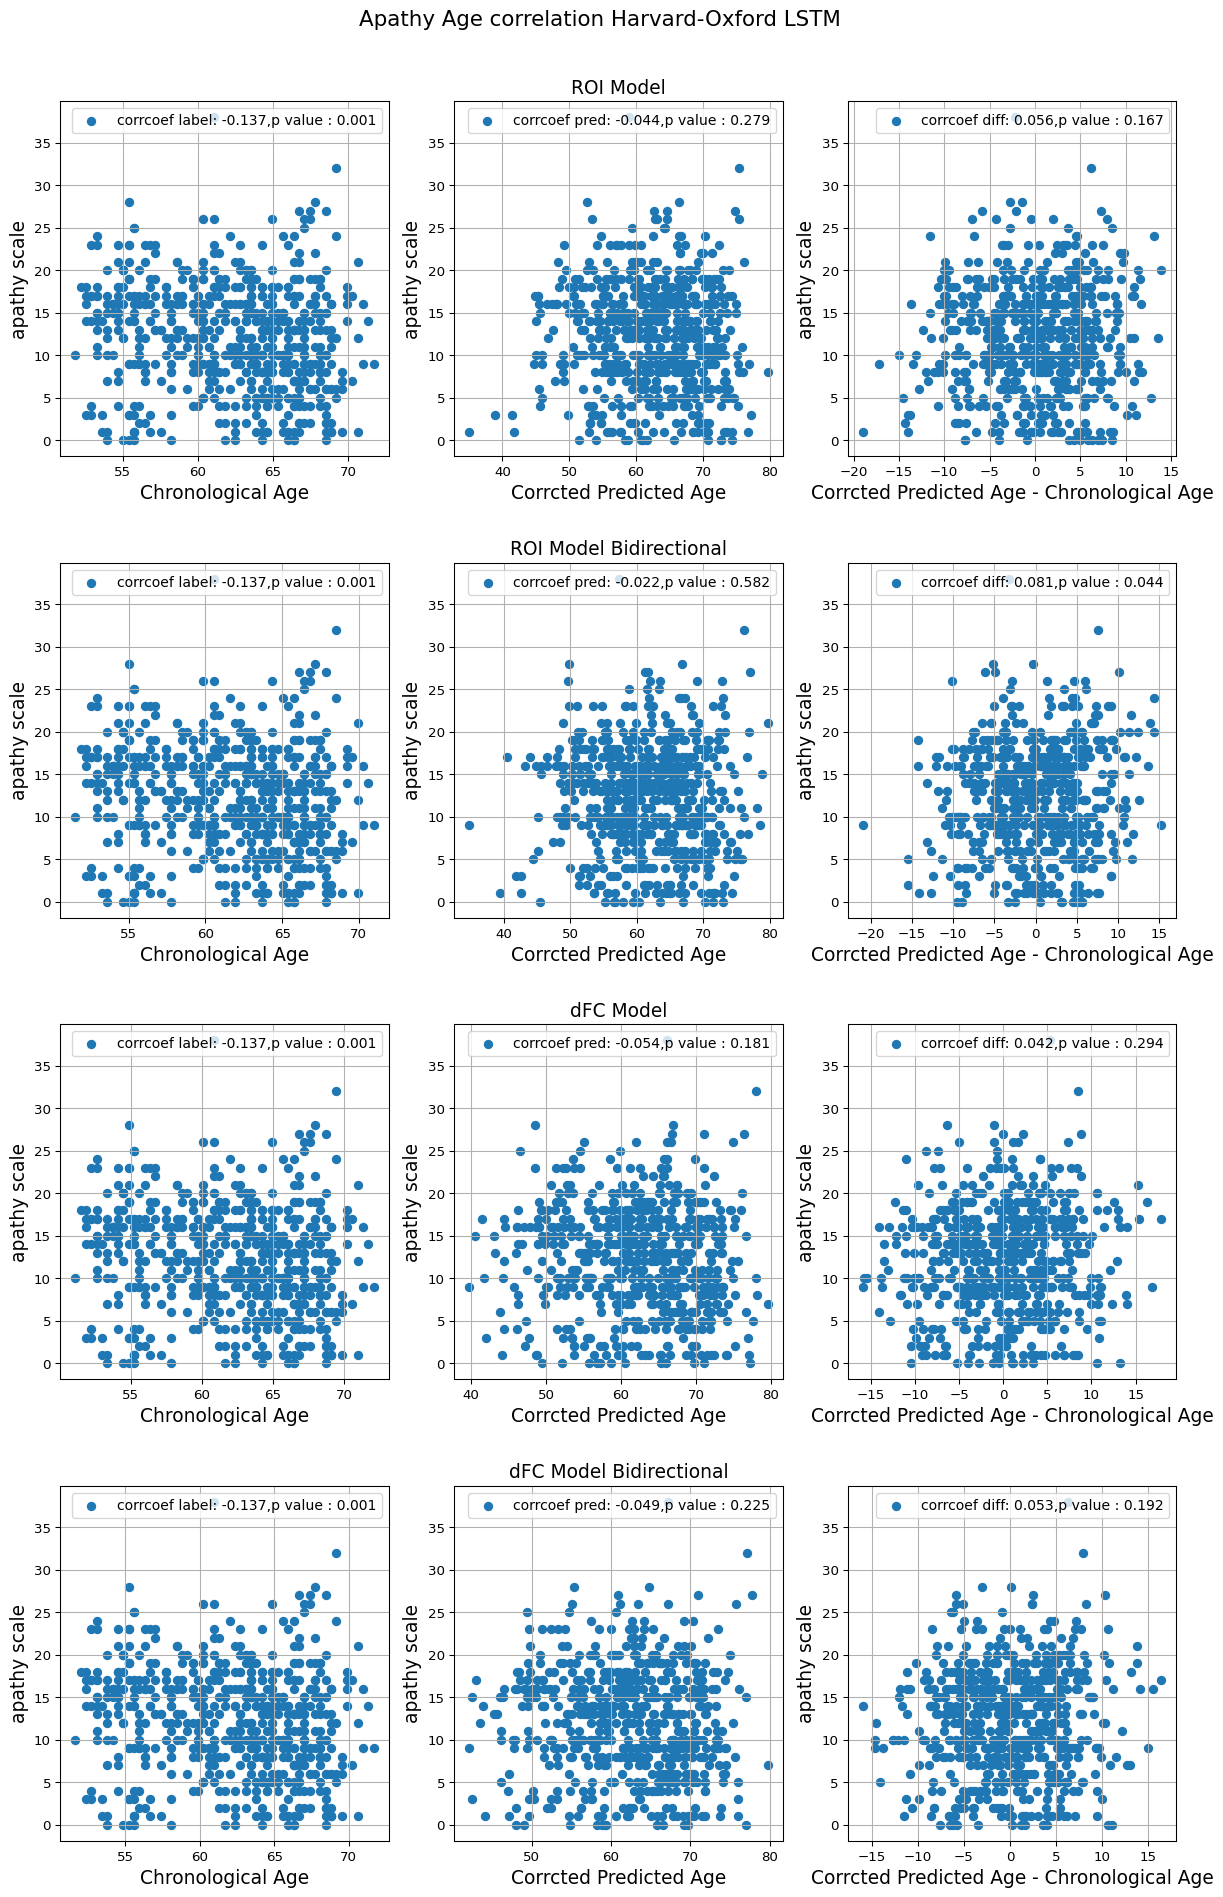

In [40]:
test_compare(test_pred_ho_lstm,
             test_pred_ho_lstm_bi,
             test_pred_ho_dynamic_lstm,
             test_pred_ho_dynamic_lstm_bi,
             test_label,
             'Apathy Age correlation Harvard-Oxford LSTM')

## 相補性

In [41]:
def test_complement(preds1,preds2,title=''):
    for i in range(n_splits):
        if not i:
            pred1 = preds1[i].mean(axis=0)
        else:
            pred1 = np.concatenate([pred1,preds1[i].mean(axis=0)])
    for i in range(n_splits):
        if not i:
            pred2 = preds2[i].mean(axis=0)
        else:
            pred2 = np.concatenate([pred2,preds2[i].mean(axis=0)])
    
    new_line = '\n'

    corr,p = pearsonr(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    lr = LinearRegression()
    lr.fit(pred1*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    
    plt.figure(figsize=(6, 6), dpi=96)
    plt.scatter(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean,
               label = f'corrcoef: {corr:.3f}{new_line}p value : {p}')
    plt.title(title, fontsize=14)   # 図のタイトル
    plt.legend(fontsize=10.5)
    plt.grid()                     # グリッド線を表示
    plt.show()                     # 図の表示

    print("相関係数: ", corr)
    print('r^2 data: ', r2_score(pred1[:,0],pred2[:,0]))
    print('切片: ', lr.intercept_)
    print('傾き: ', lr.coef_[0])

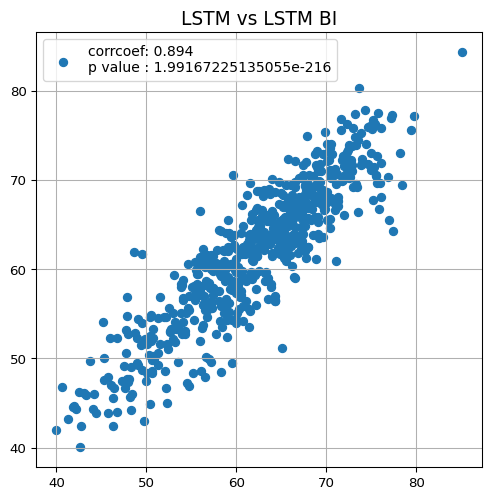

相関係数:  0.8944463208697516
r^2 data:  0.7930336268884312
切片:  7.778404
傾き:  0.8712949


In [42]:
test_complement(test_pred_aal_lstm,test_pred_aal_lstm_bi,'LSTM vs LSTM BI')

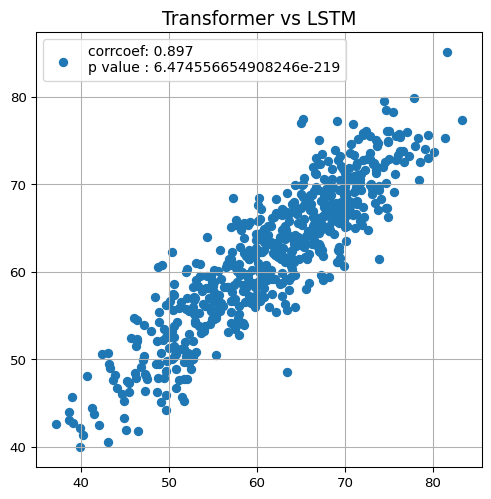

相関係数:  0.8965130417066238
r^2 data:  0.8024958519741542
切片:  11.870845322711958
傾き:  0.8125731248440724


In [43]:
test_complement(test_pred_aal_1,test_pred_aal_lstm,'Transformer vs LSTM')

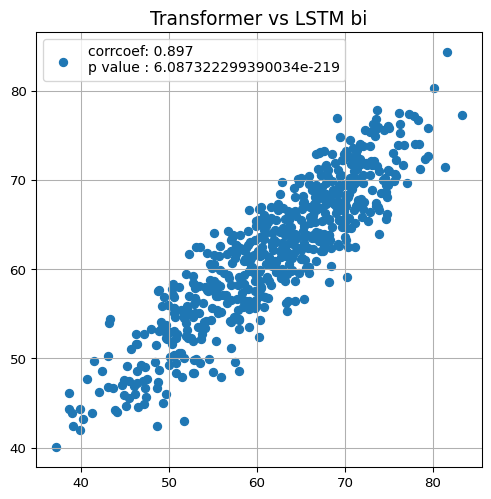

相関係数:  0.8965350552526968
r^2 data:  0.8034763448291068
切片:  12.962325081356063
傾き:  0.7915602156924869


In [44]:
test_complement(test_pred_aal_1,test_pred_aal_lstm_bi,'Transformer vs LSTM bi')

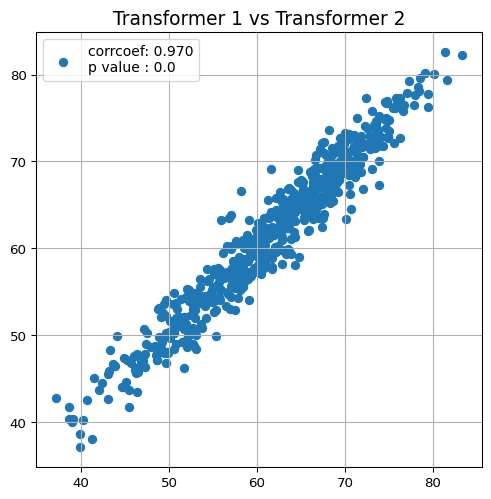

相関係数:  0.9698411179785185
r^2 data:  0.9399105373738679
切片:  2.145481720883204
傾き:  0.9657110252241514


In [45]:
test_complement(test_pred_aal_1,test_pred_aal_2,'Transformer 1 vs Transformer 2')

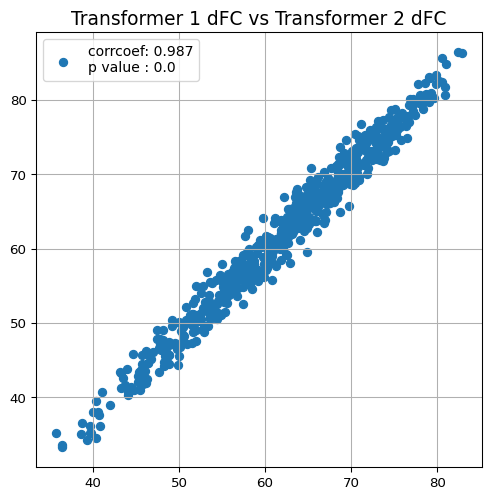

相関係数:  0.9867909258868134
r^2 data:  0.9511704974343689
切片:  -7.63496
傾き:  1.1219445


In [46]:
test_complement(test_pred_aal_dynamic_1,test_pred_aal_dynamic_2,
                'Transformer 1 dFC vs Transformer 2 dFC')

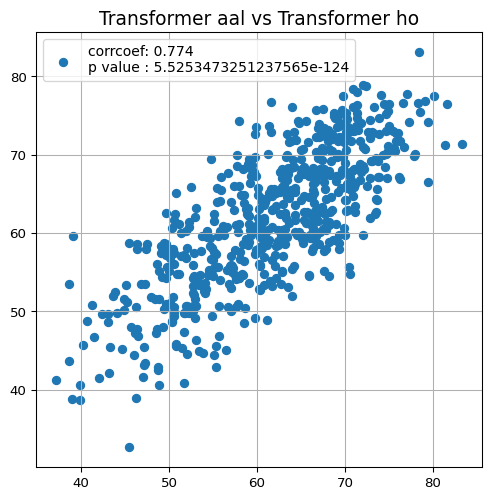

相関係数:  0.7744173856455604
r^2 data:  0.5567303204218136
切片:  14.98198640878909
傾き:  0.7597554242555649


In [47]:
test_complement(test_pred_aal_1,test_pred_ho_1,'Transformer AAL vs Transformer HO')

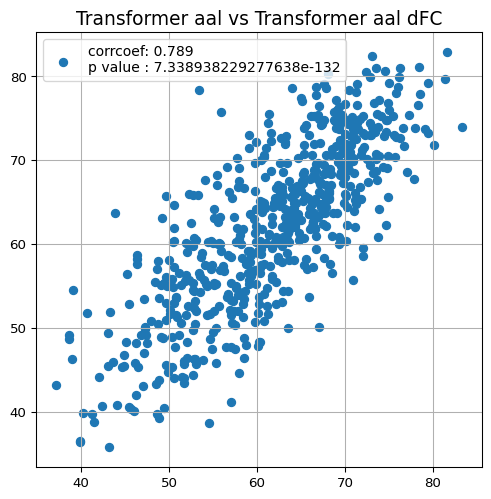

相関係数:  0.7891122405986726
r^2 data:  0.5236264915599504
切片:  8.529442643304712
傾き:  0.8684291395641349


In [48]:
test_complement(test_pred_aal_1,test_pred_aal_dynamic_1,'Transformer aal vs Transformer aal dFC')

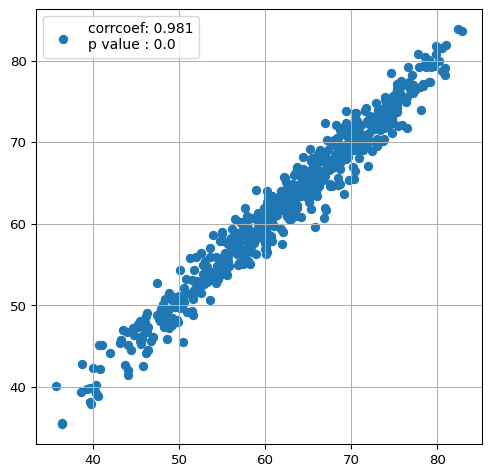

相関係数:  0.9812629207623014
r^2 data:  0.9627931246203908
切片:  2.4901505
傾き:  0.96134615


In [49]:
test_complement(test_pred_aal_dynamic_1,test_pred_multi_aal_dynamic_1)

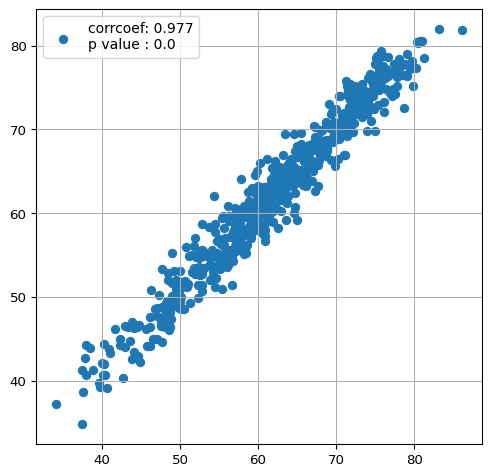

相関係数:  0.9765183419181949
r^2 data:  0.9524091451496146
切片:  3.5286217
傾き:  0.9482887


In [50]:
test_complement(test_pred_ho_dynamic_1,test_pred_multi_ho_dynamic_1)

## 男女分類

In [51]:
test_label_multi = test_label_multi_aal_1

In [52]:
def test_sex_plot(preds_ROI1,
              preds_ROI2,
              preds_dfc1,
              preds_dfc2,
              labels,
              title=''):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=96)
    fig.suptitle(title, fontsize=14, x=0.5, y=0.92)   # 図のタイトル
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    
    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,1:2]
            else:
                label = np.concatenate([label,labels[i,:,1:2]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,1:2]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,1:2]])

        if n == 0:
            lis = [0,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            lis = [0,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            lis = [1,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            lis = [1,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'

        new_line = '\n'

        acc = 0
        for i,c in enumerate(label[:,0]):
            if c == 1:
                if pred[:,0][i] >= 0.5:
                    acc += 1
            else:
                if pred[:,0][i] < 0.5:
                    acc += 1
        q = 1/2
        n = len(label[:,0])
        z = (acc - n*q)/np.sqrt(n*q*(1-q))
        p = norm.sf(z)
        acc = acc/len(label[:,0])
        
        axs[lis[0], lis[1]].scatter(label[:,0],pred[:,0],label = f'train accuracy : {acc:.3f}{new_line}p value : {p}')
        
        plt.axes(axs[lis[0], lis[1]])
        plt.title(tit, fontsize=14)    # x軸のラベル
        plt.xlabel('chronological sex', fontsize=14)    # x軸のラベル
        plt.ylabel('predicted probability', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        
    path = '../04_result/image/'
    title = title.split()
    path += 'Gender_'
    for s in title:
        path += s + '_'
    path = path[:-1] + '.png'

    fig.savefig(path)

### Multi AAL

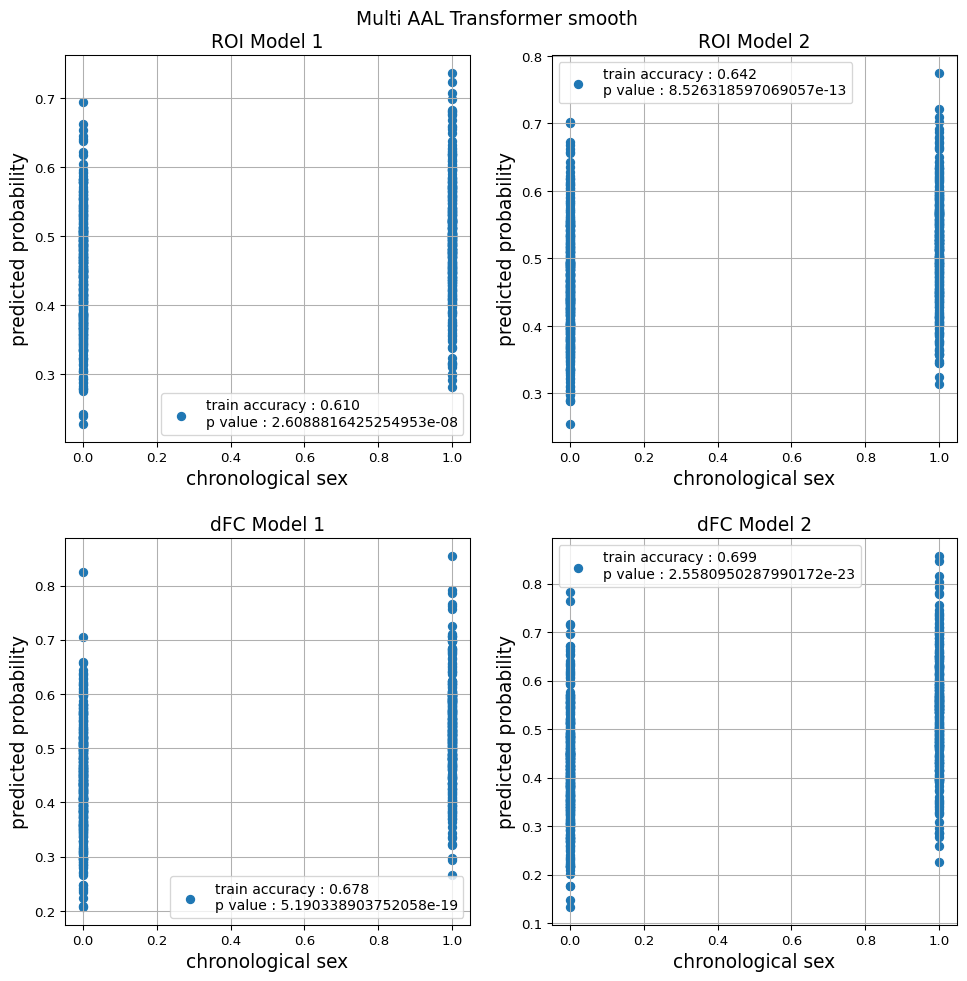

In [54]:
#test_sex_plot(test_pred_multi_aal_1,
#              test_pred_multi_aal_2,
#              test_pred_multi_aal_dynamic_1,
#              test_pred_multi_aal_dynamic_2,
#              test_label_multi,'Multi AAL Transformer')
test_sex_plot(test_pred_multi_smooth_aal_1,
              test_pred_multi_smooth_aal_2,
              test_pred_multi_smooth_aal_dynamic_1,
              test_pred_multi_smooth_aal_dynamic_2,
              test_label_multi,'Multi AAL Transformer smoothing')

### Multi Harvard-Oxford

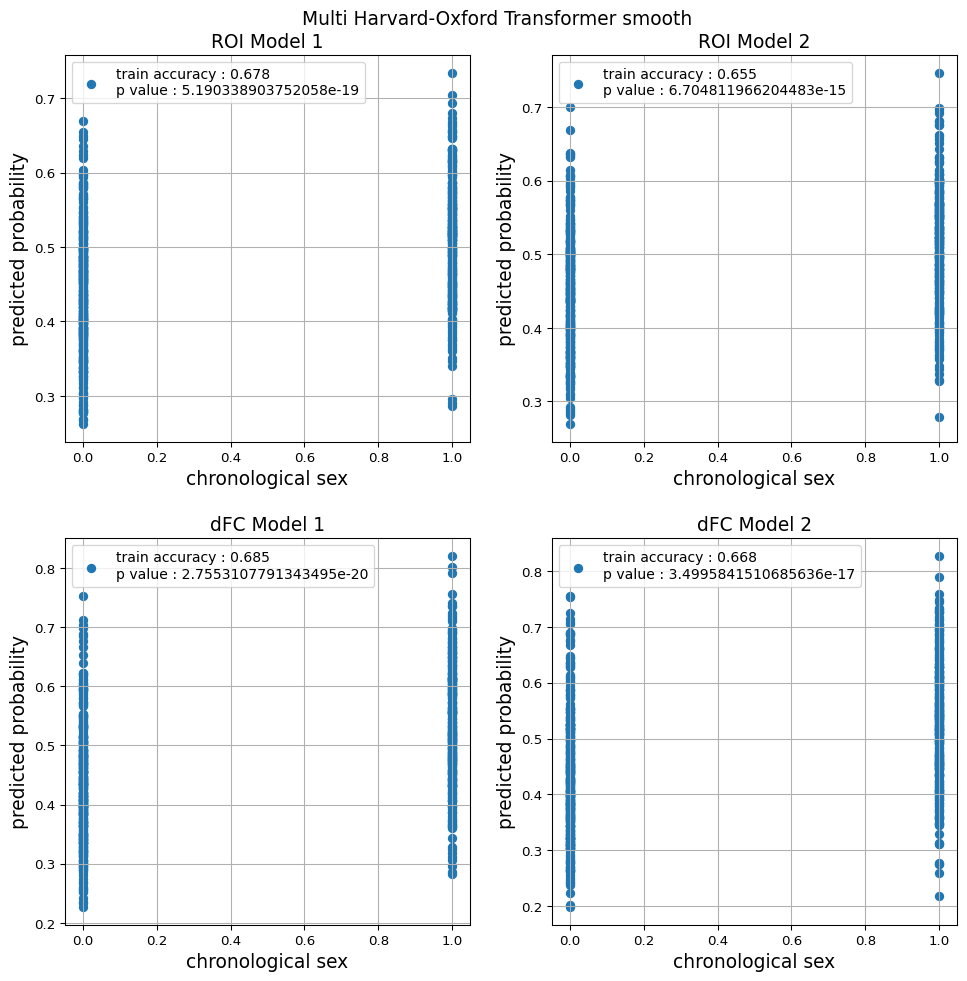

In [56]:
#test_sex_plot(test_pred_multi_ho_1,
#              test_pred_multi_ho_2,
#              test_pred_multi_ho_dynamic_1,
#              test_pred_multi_ho_dynamic_2,
#              test_label_multi,'Multi Harvard-Oxford Transformer')
test_sex_plot(test_pred_multi_smooth_ho_1,
              test_pred_multi_smooth_ho_2,
              test_pred_multi_smooth_ho_dynamic_1,
              test_pred_multi_smooth_ho_dynamic_2,
              test_label_multi,'Multi Harvard-Oxford Transformer smoothing')

### Single AAL

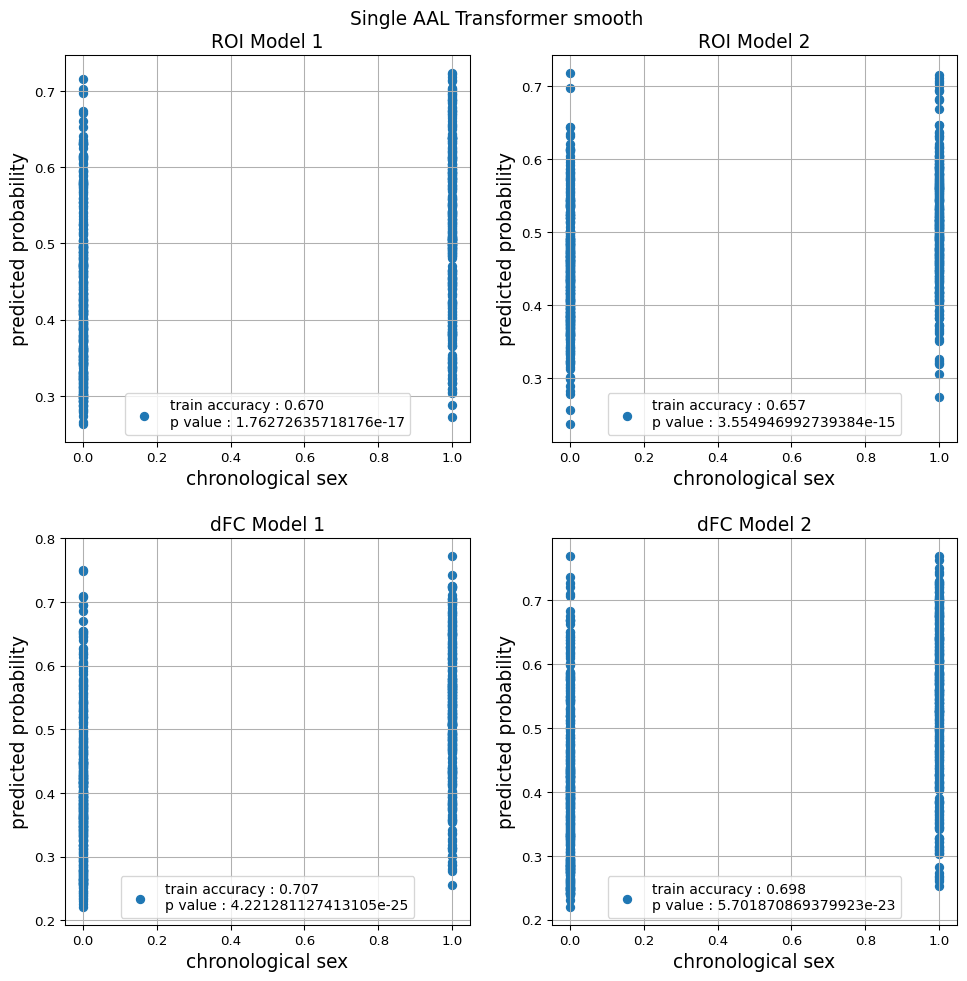

In [57]:
test_sex_plot(test_pred_aal_sex_1 ,
              test_pred_aal_sex_2,
              test_pred_aal_sex_dynamic_1,
              test_pred_aal_sex_dynamic_2,
              test_label_multi,'Single AAL Transformer smoothing')

### Single Harvard-Oxford

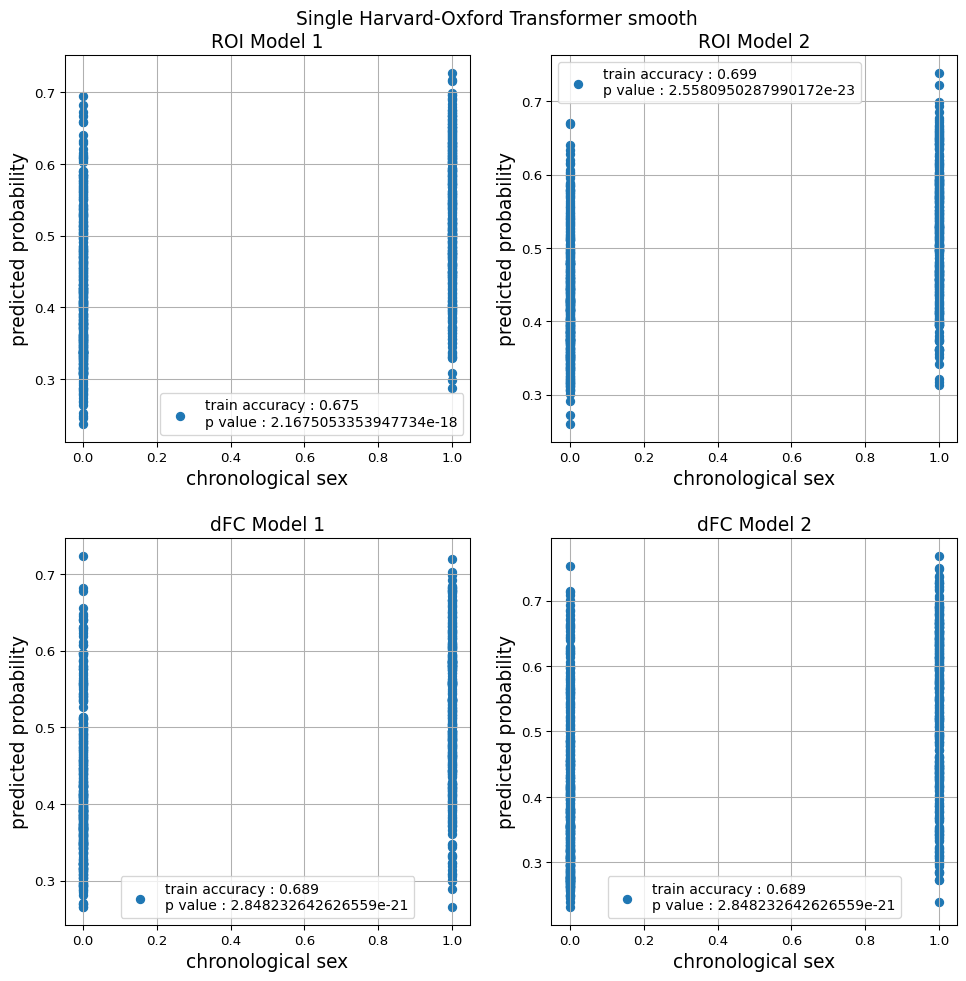

In [58]:
test_sex_plot(test_pred_ho_sex_1 ,
              test_pred_ho_sex_2,
              test_pred_ho_sex_dynamic_1,
              test_pred_ho_sex_dynamic_2,
              test_label_multi,'Single Harvard-Oxford Transformer smoothing')

In [59]:
#!zip -r ../04_result/image.zip ../04_result/image